In [2]:
from model.indexer import load_amr_config, count_valid_variants
from model.analyzer.config import WeightConfig
from model.analyzer.qubo_builder_helper import create_qubo_builder_func
from model.analyzer.weight_experiment import run_weight_sweep, summarize_results, run_single_weight_experiment
from model.analyzer.metrics import MetricsEvaluator

print("✅ Alle Imports erfolgreich!")
amr, slot, task, precedence = load_amr_config("data/amr3_slots6_task6.json")

print(f"✅ Config geladen:")
print(f"   Tasks: {len(task)}")
print(f"   Robots: {len(amr)}")
print(f"   Slots: {len(slot)}")

#num_variants = count_valid_variants(amr, slot, task)
#print(num_variants)

✅ Alle Imports erfolgreich!
✅ Config geladen:
   Tasks: 6
   Robots: 3
   Slots: 6


In [3]:
qubo_builder_func = create_qubo_builder_func(
    tasks=task,
    robots=amr,
    slots=slot
)
configs =[
    WeightConfig("ultra_100_50",        100,   100,    50,    50,   0,  1.0),
    WeightConfig("ultra_120_60",        120,   120,    60,    60,   0,  1.0)
]
configs_ultrafine = [
    
    # ========================================
    # BLOCK 1: VALIDATED PATTERN - Ratio 2:1 (C1/C2 : C3)
    # Based on successful configs
    # ========================================
    
    # --- Low Range (100-300) mit Ratio 2:1 ---
    WeightConfig("ultra_100_50",        100,   100,    50,    50,   0,  1.0),
    WeightConfig("ultra_120_60",        120,   120,    60,    60,   0,  1.0),
    WeightConfig("ultra_150_75",        150,   150,    75,    75,   0,  1.0),
    WeightConfig("ultra_180_90",        180,   180,    90,    90,   0,  1.0),
    WeightConfig("ultra_200_100",       200,   200,   100,   100,   0,  1.0),
    WeightConfig("ultra_250_125",       250,   250,   125,   125,   0,  1.0),
    WeightConfig("ultra_300_150",       300,   300,   150,   150,   0,  1.0),
    
    # --- Mid Range (400-1000) mit Ratio 2:1 ---
    WeightConfig("ultra_400_200",       400,   400,   200,   200,   0,  1.0),
    WeightConfig("ultra_500_250",       500,   500,   250,   250,   0,  1.0),
    WeightConfig("ultra_600_300",       600,   600,   300,   300,   0,  1.0),
    WeightConfig("ultra_700_350",       700,   700,   350,   350,   0,  1.0),
    WeightConfig("ultra_800_400",       800,   800,   400,   400,   0,  1.0),
    WeightConfig("ultra_900_450",       900,   900,   450,   450,   0,  1.0),
    WeightConfig("ultra_1000_500",     1000,  1000,   500,   500,   0,  1.0),
    
    # --- High Range (1500-5000) mit Ratio 2:1 ---
    WeightConfig("ultra_1500_750",     1500,  1500,   750,   750,   0,  1.0),
    WeightConfig("ultra_2000_1000",    2000,  2000,  1000,  1000,   0,  1.0),
    WeightConfig("ultra_2500_1250",    2500,  2500,  1250,  1250,   0,  1.0),
    WeightConfig("ultra_3000_1500",    3000,  3000,  1500,  1500,   0,  1.0),
    WeightConfig("ultra_4000_2000",    4000,  4000,  2000,  2000,   0,  1.0),
    WeightConfig("ultra_5000_2500",    5000,  5000,  2500,  2500,   0,  1.0),
    
    # ========================================
    # BLOCK 2: RATIO 3:1 (Even stronger C1/C2 dominance)
    # ========================================
    
    WeightConfig("ratio3_150_50",       150,   150,    50,    50,   0,  1.0),
    WeightConfig("ratio3_300_100",      300,   300,   100,   100,   0,  1.0),
    WeightConfig("ratio3_450_150",      450,   450,   150,   150,   0,  1.0),
    WeightConfig("ratio3_600_200",      600,   600,   200,   200,   0,  1.0),
    WeightConfig("ratio3_900_300",      900,   900,   300,   300,   0,  1.0),
    WeightConfig("ratio3_1200_400",    1200,  1200,   400,   400,   0,  1.0),
    WeightConfig("ratio3_1500_500",    1500,  1500,   500,   500,   0,  1.0),
    WeightConfig("ratio3_2100_700",    2100,  2100,   700,   700,   0,  1.0),
    WeightConfig("ratio3_3000_1000",   3000,  3000,  1000,  1000,   0,  1.0),
    
    # ========================================
    # BLOCK 3: RATIO 4:1 (Maximum dominance)
    # ========================================
    
    WeightConfig("ratio4_200_50",       200,   200,    50,    50,   0,  1.0),
    WeightConfig("ratio4_400_100",      400,   400,   100,   100,   0,  1.0),
    WeightConfig("ratio4_600_150",      600,   600,   150,   150,   0,  1.0),
    WeightConfig("ratio4_800_200",      800,   800,   200,   200,   0,  1.0),
    WeightConfig("ratio4_1000_250",    1000,  1000,   250,   250,   0,  1.0),
    WeightConfig("ratio4_1200_300",    1200,  1200,   300,   300,   0,  1.0),
    WeightConfig("ratio4_1600_400",    1600,  1600,   400,   400,   0,  1.0),
    WeightConfig("ratio4_2000_500",    2000,  2000,   500,   500,   0,  1.0),
    
    # ========================================
    # BLOCK 4: ASYMMETRIC C1 vs C2 (mit niedrigem C3)
    # ========================================
    
    # C1 > C2
    WeightConfig("asym_300_200_100",    300,   200,   100,   100,   0,  1.0),
    WeightConfig("asym_400_300_150",    400,   300,   150,   150,   0,  1.0),
    WeightConfig("asym_500_300_150",    500,   300,   150,   150,   0,  1.0),
    WeightConfig("asym_600_400_200",    600,   400,   200,   200,   0,  1.0),
    WeightConfig("asym_800_500_250",    800,   500,   250,   250,   0,  1.0),
    WeightConfig("asym_1000_600_300",  1000,   600,   300,   300,   0,  1.0),
    
    # C2 > C1
    WeightConfig("asym_200_300_100",    200,   300,   100,   100,   0,  1.0),
    WeightConfig("asym_300_400_150",    300,   400,   150,   150,   0,  1.0),
    WeightConfig("asym_300_500_150",    300,   500,   150,   150,   0,  1.0),
    WeightConfig("asym_400_600_200",    400,   600,   200,   200,   0,  1.0),
    WeightConfig("asym_500_800_250",    500,   800,   250,   250,   0,  1.0),
    WeightConfig("asym_600_1000_300",   600,  1000,   300,   300,   0,  1.0),
    
    # ========================================
    # BLOCK 5: VERY LOW C3 (C3 << C1/C2)
    # Test ob sehr niedrige C3-Werte noch besser funktionieren
    # ========================================
    
    WeightConfig("vlow_c3_200_20",      200,   200,    20,    20,   0,  1.0),
    WeightConfig("vlow_c3_300_30",      300,   300,    30,    30,   0,  1.0),
    WeightConfig("vlow_c3_400_40",      400,   400,    40,    40,   0,  1.0),
    WeightConfig("vlow_c3_500_50",      500,   500,    50,    50,   0,  1.0),
    WeightConfig("vlow_c3_600_60",      600,   600,    60,    60,   0,  1.0),
    WeightConfig("vlow_c3_800_80",      800,   800,    80,    80,   0,  1.0),
    WeightConfig("vlow_c3_1000_100",   1000,  1000,   100,   100,   0,  1.0),
    WeightConfig("vlow_c3_1500_150",   1500,  1500,   150,   150,   0,  1.0),
    
    # ========================================
    # BLOCK 6: C3_AND vs C3_CAP unterschiedlich
    # Teste ob einer der beiden dominieren sollte
    # ========================================
    
    # C3_and niedriger
    WeightConfig("c3split_500_250_100",  500,   500,   100,   250,   0,  1.0),
    WeightConfig("c3split_500_100_250",  500,   500,   250,   100,   0,  1.0),
    WeightConfig("c3split_600_300_150",  600,   600,   150,   300,   0,  1.0),
    WeightConfig("c3split_600_150_300",  600,   600,   300,   150,   0,  1.0),
    WeightConfig("c3split_800_400_200",  800,   800,   200,   400,   0,  1.0),
    WeightConfig("c3split_800_200_400",  800,   800,   400,   200,   0,  1.0),
    
    # ========================================
    # BLOCK 7: GOLDEN SWEET SPOT DENSE SAMPLING
    # Based on validated configs: C1,C2 ∈ [300,600], C3 ∈ [150,300]
    # ========================================
    
    WeightConfig("sweet_320_160",       320,   320,   160,   160,   0,  1.0),
    WeightConfig("sweet_350_175",       350,   350,   175,   175,   0,  1.0),
    WeightConfig("sweet_380_190",       380,   380,   190,   190,   0,  1.0),
    WeightConfig("sweet_420_210",       420,   420,   210,   210,   0,  1.0),
    WeightConfig("sweet_450_225",       450,   450,   225,   225,   0,  1.0),
    WeightConfig("sweet_480_240",       480,   480,   240,   240,   0,  1.0),
    WeightConfig("sweet_520_260",       520,   520,   260,   260,   0,  1.0),
    WeightConfig("sweet_550_275",       550,   550,   275,   275,   0,  1.0),
    WeightConfig("sweet_580_290",       580,   580,   290,   290,   0,  1.0),
    WeightConfig("sweet_620_310",       620,   620,   310,   310,   0,  1.0),
    WeightConfig("sweet_650_325",       650,   650,   325,   325,   0,  1.0),
#]


#configs_initial = [
    # ========================================
    # BLOCK 1: NIEDRIGE WERTE (10⁰ - 10¹)
    # Bisher unterrepräsentiert!
    # ========================================
    
    # Sehr niedrig (10⁰)
    WeightConfig("low_all_1",                1,      1,      1,      1,     0,   1.0),
    WeightConfig("low_all_2",                2,      2,      2,      2,     0,   1.0),
    WeightConfig("low_all_5",                5,      5,      5,      5,     0,   1.0),
    
    # Niedrig (10¹)
    WeightConfig("low_all_10",              10,     10,     10,     10,     0,   1.0),
    WeightConfig("low_all_15",              15,     15,     15,     15,     0,   1.0),
    WeightConfig("low_all_20",              20,     20,     20,     20,     0,   1.0),
    WeightConfig("low_all_30",              30,     30,     30,     30,     0,   1.0),
    WeightConfig("low_all_50",              50,     50,     50,     50,     0,   1.0),
    WeightConfig("low_all_75",              75,     75,     75,     75,     0,   1.0),
    
    # Asymmetrisch niedrig
    WeightConfig("low_c1_high",             50,      5,      5,      5,     0,   1.0),
    WeightConfig("low_c2_high",              5,     50,      5,      5,     0,   1.0),
    WeightConfig("low_c3and_high",           5,      5,     50,      5,     0,   1.0),
    WeightConfig("low_c3cap_high",           5,      5,      5,     50,     0,   1.0),
    
    # ========================================
    # BLOCK 2: MITTLERE WERTE (10² - 10³)
    # Bisher stark geclustert - mehr Variation!
    # ========================================
    
    # Feinere Abstufung bei 10²
    WeightConfig("mid_100",                100,    100,    100,    100,     0,   1.0),
    WeightConfig("mid_150",                150,    150,    150,    150,     0,   1.0),
    WeightConfig("mid_200",                200,    200,    200,    200,     0,   1.0),
    WeightConfig("mid_300",                300,    300,    300,    300,     0,   1.0),
    WeightConfig("mid_400",                400,    400,    400,    400,     0,   1.0),
    WeightConfig("mid_500",                500,    500,    500,    500,     0,   1.0),
    WeightConfig("mid_750",                750,    750,    750,    750,     0,   1.0),
    
    # Übergang 10² → 10³
    WeightConfig("mid_1k",                1000,   1000,   1000,   1000,     0,   1.0),
    WeightConfig("mid_1.5k",              1500,   1500,   1500,   1500,     0,   1.0),
    WeightConfig("mid_2k",                2000,   2000,   2000,   2000,     0,   1.0),
    WeightConfig("mid_3k",                3000,   3000,   3000,   3000,     0,   1.0),
    WeightConfig("mid_4k",                4000,   4000,   4000,   4000,     0,   1.0),
    WeightConfig("mid_5k",                5000,   5000,   5000,   5000,     0,   1.0),
    WeightConfig("mid_7.5k",              7500,   7500,   7500,   7500,     0,   1.0),
    
    # Asymmetrisch mittlere Werte
    WeightConfig("mid_c1_3x",             3000,   1000,   1000,   1000,     0,   1.0),
    WeightConfig("mid_c2_3x",             1000,   3000,   1000,   1000,     0,   1.0),
    WeightConfig("mid_c3and_3x",          1000,   1000,   3000,   1000,     0,   1.0),
    WeightConfig("mid_c3cap_3x",          1000,   1000,   1000,   3000,     0,   1.0),
    
    WeightConfig("mid_c12_high",          2000,   2000,    500,    500,     0,   1.0),
    WeightConfig("mid_c3_high",            500,    500,   2000,   2000,     0,   1.0),
    
    # ========================================
    # BLOCK 3: HOHE WERTE (10⁴)
    # Bisher unterrepräsentiert!
    # ========================================
    
    WeightConfig("high_10k",             10000,  10000,  10000,  10000,     0,   1.0),
    WeightConfig("high_15k",             15000,  15000,  15000,  15000,     0,   1.0),
    WeightConfig("high_20k",             20000,  20000,  20000,  20000,     0,   1.0),
    WeightConfig("high_30k",             30000,  30000,  30000,  30000,     0,   1.0),
    WeightConfig("high_50k",             50000,  50000,  50000,  50000,     0,   1.0),
    WeightConfig("high_75k",             75000,  75000,  75000,  75000,     0,   1.0),
    
    # Asymmetrisch hoch
    WeightConfig("high_c1_dom",          20000,   5000,   5000,   5000,     0,   1.0),
    WeightConfig("high_c2_dom",           5000,  20000,   5000,   5000,     0,   1.0),
    WeightConfig("high_c3and_dom",        5000,   5000,  20000,   5000,     0,   1.0),
    WeightConfig("high_c3cap_dom",        5000,   5000,   5000,  20000,     0,   1.0),
    
    # ========================================
    # BLOCK 4: SEHR HOHE WERTE (10⁵)
    # Bisher fast nicht getestet!
    # ========================================
    
    WeightConfig("vhigh_100k",          100000, 100000, 100000, 100000,     0,   1.0),
    WeightConfig("vhigh_200k",          200000, 200000, 200000, 200000,     0,   1.0),
    WeightConfig("vhigh_500k",          500000, 500000, 500000, 500000,     0,   1.0),
    
    # ========================================
    # BLOCK 5: LOGARITHMISCHE STUFEN
    # Für gleichmäßige Abdeckung
    # ========================================
    
    # Jede Größenordnung systematisch
    WeightConfig("log_step_1",               1,      1,      1,      1,     0,   1.0),
    WeightConfig("log_step_3",               3,      3,      3,      3,     0,   1.0),
    WeightConfig("log_step_10",             10,     10,     10,     10,     0,   1.0),
    WeightConfig("log_step_30",             30,     30,     30,     30,     0,   1.0),
    WeightConfig("log_step_100",           100,    100,    100,    100,     0,   1.0),
    WeightConfig("log_step_300",           300,    300,    300,    300,     0,   1.0),
    WeightConfig("log_step_1k",           1000,   1000,   1000,   1000,     0,   1.0),
    WeightConfig("log_step_3k",           3000,   3000,   3000,   3000,     0,   1.0),
    WeightConfig("log_step_10k",         10000,  10000,  10000,  10000,     0,   1.0),
    WeightConfig("log_step_30k",         30000,  30000,  30000,  30000,     0,   1.0),
    WeightConfig("log_step_100k",       100000, 100000, 100000, 100000,     0,   1.0),
    
    # ========================================
    # BLOCK 6: SWEET SPOT EXPLORATION
    # Basierend auf 24.7% Success bei 10²-10³
    # ========================================
    
    WeightConfig("sweet_125",              125,    125,    125,    125,     0,   1.0),
    WeightConfig("sweet_175",              175,    175,    175,    175,     0,   1.0),
    WeightConfig("sweet_225",              225,    225,    225,    225,     0,   1.0),
    WeightConfig("sweet_275",              275,    275,    275,    275,     0,   1.0),
    WeightConfig("sweet_350",              350,    350,    350,    350,     0,   1.0),
    WeightConfig("sweet_450",              450,    450,    450,    450,     0,   1.0),
    WeightConfig("sweet_600",              600,    600,    600,    600,     0,   1.0),
    WeightConfig("sweet_800",              800,    800,    800,    800,     0,   1.0),
    WeightConfig("sweet_1200",            1200,   1200,   1200,   1200,     0,   1.0),
    WeightConfig("sweet_1750",            1750,   1750,   1750,   1750,     0,   1.0),
    WeightConfig("sweet_2500",            2500,   2500,   2500,   2500,     0,   1.0),
    WeightConfig("sweet_3500",            3500,   3500,   3500,   3500,     0,   1.0),
    
    # ========================================
    # BLOCK 7: RATIO TESTS
    # Verschiedene Verhältnisse
    # ========================================
    
    # 1:2:4:8 Verhältnis
    WeightConfig("ratio_1_2_4_8_base10",    10,     20,     40,     80,     0,   1.0),
    WeightConfig("ratio_1_2_4_8_base100",  100,    200,    400,    800,     0,   1.0),
    WeightConfig("ratio_1_2_4_8_base1k",  1000,   2000,   4000,   8000,     0,   1.0),
    
    # Umgekehrt: 8:4:2:1
    WeightConfig("ratio_8_4_2_1_base10",    80,     40,     20,     10,     0,   1.0),
    WeightConfig("ratio_8_4_2_1_base100",  800,    400,    200,    100,     0,   1.0),
    
    # 1:1:10:10 (Resource vs Constraint)
    WeightConfig("ratio_res_vs_con_low",   100,    100,   1000,   1000,     0,   1.0),
    WeightConfig("ratio_res_vs_con_mid",   500,    500,   5000,   5000,     0,   1.0),
    WeightConfig("ratio_res_vs_con_high", 1000,   1000,  10000,  10000,     0,   1.0),
#]

#configs_finetuning = [
    
    # ========================================
    # BLOCK 1: SWEET SPOT DENSE SAMPLING (10² - 10³)
    # 80% der Configs hier - Feine Abstufungen!
    # ========================================
    
    # --- Feinste Abstufung 100-500 (20 configs) ---
    WeightConfig("fine_100",               100,    100,    100,    100,     0,   1.0),
    WeightConfig("fine_120",               120,    120,    120,    120,     0,   1.0),
    WeightConfig("fine_140",               140,    140,    140,    140,     0,   1.0),
    WeightConfig("fine_160",               160,    160,    160,    160,     0,   1.0),
    WeightConfig("fine_180",               180,    180,    180,    180,     0,   1.0),
    WeightConfig("fine_200",               200,    200,    200,    200,     0,   1.0),
    WeightConfig("fine_225",               225,    225,    225,    225,     0,   1.0),
    WeightConfig("fine_250",               250,    250,    250,    250,     0,   1.0),
    WeightConfig("fine_275",               275,    275,    275,    275,     0,   1.0),
    WeightConfig("fine_300",               300,    300,    300,    300,     0,   1.0),
    WeightConfig("fine_325",               325,    325,    325,    325,     0,   1.0),
    WeightConfig("fine_350",               350,    350,    350,    350,     0,   1.0),
    WeightConfig("fine_375",               375,    375,    375,    375,     0,   1.0),
    WeightConfig("fine_400",               400,    400,    400,    400,     0,   1.0),
    WeightConfig("fine_425",               425,    425,    425,    425,     0,   1.0),
    WeightConfig("fine_450",               450,    450,    450,    450,     0,   1.0),
    WeightConfig("fine_475",               475,    475,    475,    475,     0,   1.0),
    WeightConfig("fine_500",               500,    500,    500,    500,     0,   1.0),
    
    # --- Mittlere Abstufung 500-1500 (15 configs) ---
    WeightConfig("fine_550",               550,    550,    550,    550,     0,   1.0),
    WeightConfig("fine_600",               600,    600,    600,    600,     0,   1.0),
    WeightConfig("fine_650",               650,    650,    650,    650,     0,   1.0),
    WeightConfig("fine_700",               700,    700,    700,    700,     0,   1.0),
    WeightConfig("fine_750",               750,    750,    750,    750,     0,   1.0),
    WeightConfig("fine_800",               800,    800,    800,    800,     0,   1.0),
    WeightConfig("fine_850",               850,    850,    850,    850,     0,   1.0),
    WeightConfig("fine_900",               900,    900,    900,    900,     0,   1.0),
    WeightConfig("fine_1000",             1000,   1000,   1000,   1000,     0,   1.0),
    WeightConfig("fine_1100",             1100,   1100,   1100,   1100,     0,   1.0),
    WeightConfig("fine_1200",             1200,   1200,   1200,   1200,     0,   1.0),
    WeightConfig("fine_1300",             1300,   1300,   1300,   1300,     0,   1.0),
    WeightConfig("fine_1400",             1400,   1400,   1400,   1400,     0,   1.0),
    WeightConfig("fine_1500",             1500,   1500,   1500,   1500,     0,   1.0),
    
    # --- Höhere Abstufung 1500-5000 (12 configs) ---
    WeightConfig("fine_1750",             1750,   1750,   1750,   1750,     0,   1.0),
    WeightConfig("fine_2000",             2000,   2000,   2000,   2000,     0,   1.0),
    WeightConfig("fine_2250",             2250,   2250,   2250,   2250,     0,   1.0),
    WeightConfig("fine_2500",             2500,   2500,   2500,   2500,     0,   1.0),
    WeightConfig("fine_2750",             2750,   2750,   2750,   2750,     0,   1.0),
    WeightConfig("fine_3000",             3000,   3000,   3000,   3000,     0,   1.0),
    WeightConfig("fine_3500",             3500,   3500,   3500,   3500,     0,   1.0),
    WeightConfig("fine_4000",             4000,   4000,   4000,   4000,     0,   1.0),
    WeightConfig("fine_4500",             4500,   4500,   4500,   4500,     0,   1.0),
    WeightConfig("fine_5000",             5000,   5000,   5000,   5000,     0,   1.0),
    
    # --- Asymmetrische Configs im Sweet Spot (10 configs) ---
    # Teste verschiedene Verhältnisse innerhalb Success-Zone
    WeightConfig("asym_c1_2x",             400,    200,    200,    200,     0,   1.0),
    WeightConfig("asym_c2_2x",             200,    400,    200,    200,     0,   1.0),
    WeightConfig("asym_c3and_2x",          200,    200,    400,    200,     0,   1.0),
    WeightConfig("asym_c3cap_2x",          200,    200,    200,    400,     0,   1.0),
    
    WeightConfig("asym_c12_high",          500,    500,    250,    250,     0,   1.0),
    WeightConfig("asym_c3_high",           250,    250,    500,    500,     0,   1.0),
    
    WeightConfig("asym_diag_low",          300,    300,    150,    150,     0,   1.0),
    WeightConfig("asym_diag_high",         150,    150,    300,    300,     0,   1.0),
    
    WeightConfig("asym_c1_dom",           1000,    500,    500,    500,     0,   1.0),
    WeightConfig("asym_c3and_dom",         500,    500,   1000,    500,     0,   1.0),
    
    # ========================================
    # BLOCK 2: BOUNDARY EXPLORATION (10¹ und 10⁴)
    # 15% der Configs - Grenze des Success-Bereichs
    # ========================================
    
    # --- Untere Grenze: 10¹ → 10² (8 configs) ---
    WeightConfig("bound_low_50",            50,     50,     50,     50,     0,   1.0),
    WeightConfig("bound_low_60",            60,     60,     60,     60,     0,   1.0),
    WeightConfig("bound_low_70",            70,     70,     70,     70,     0,   1.0),
    WeightConfig("bound_low_80",            80,     80,     80,     80,     0,   1.0),
    WeightConfig("bound_low_90",            90,     90,     90,     90,     0,   1.0),
    
    # Asymmetrisch an unterer Grenze
    WeightConfig("bound_low_asym1",         80,     80,    150,    150,     0,   1.0),
    WeightConfig("bound_low_asym2",        150,    150,     80,     80,     0,   1.0),
    WeightConfig("bound_low_mixed",        100,     50,    150,     75,     0,   1.0),
    
    # --- Obere Grenze: 10³ → 10⁴ (7 configs) ---
    WeightConfig("bound_high_5500",       5500,   5500,   5500,   5500,     0,   1.0),
    WeightConfig("bound_high_6000",       6000,   6000,   6000,   6000,     0,   1.0),
    WeightConfig("bound_high_7000",       7000,   7000,   7000,   7000,     0,   1.0),
    WeightConfig("bound_high_8000",       8000,   8000,   8000,   8000,     0,   1.0),
    WeightConfig("bound_high_9000",       9000,   9000,   9000,   9000,     0,   1.0),
    
    # Asymmetrisch an oberer Grenze
    WeightConfig("bound_high_asym1",      7000,   7000,   3000,   3000,     0,   1.0),
    WeightConfig("bound_high_asym2",      3000,   3000,   7000,   7000,     0,   1.0),
    
    # ========================================
    # BLOCK 3: EXTREME VERIFICATION (5%)
    # Verifikation dass außerhalb wirklich nichts funktioniert
    # ========================================
    
    # --- Sehr niedrig (3 configs) ---
    WeightConfig("extreme_low_10",          10,     10,     10,     10,     0,   1.0),
    WeightConfig("extreme_low_25",          25,     25,     25,     25,     0,   1.0),
    WeightConfig("extreme_low_40",          40,     40,     40,     40,     0,   1.0),
    
    # --- Sehr hoch (3 configs) ---
    WeightConfig("extreme_high_10k",     10000,  10000,  10000,  10000,     0,   1.0),
    WeightConfig("extreme_high_15k",     15000,  15000,  15000,  15000,     0,   1.0),
    WeightConfig("extreme_high_25k",     25000,  25000,  25000,  25000,     0,   1.0),
    
    # ========================================
    # BLOCK 4: RATIO FINE-TUNING
    # Verschiedene Verhältnisse im Sweet Spot
    # ========================================
    
    # --- 1:2 Ratios (4 configs) ---
    WeightConfig("ratio_1_2_base200",      200,    400,    200,    400,     0,   1.0),
    WeightConfig("ratio_1_2_base300",      300,    600,    300,    600,     0,   1.0),
    WeightConfig("ratio_2_1_base200",      400,    200,    400,    200,     0,   1.0),
    WeightConfig("ratio_2_1_base300",      600,    300,    600,    300,     0,   1.0),
    
    # --- 1:1:2:2 Ratios (4 configs) ---
    WeightConfig("ratio_1122_v1",          250,    250,    500,    500,     0,   1.0),
    WeightConfig("ratio_1122_v2",          300,    300,    600,    600,     0,   1.0),
    WeightConfig("ratio_2211_v1",          500,    500,    250,    250,     0,   1.0),
    WeightConfig("ratio_2211_v2",          600,    600,    300,    300,     0,   1.0),
    
    # --- 1:3 Ratios (4 configs) ---
    WeightConfig("ratio_1_3_c1",           500,   1500,    500,    500,     0,   1.0),
    WeightConfig("ratio_1_3_c2",           500,    500,   1500,    500,     0,   1.0),
    WeightConfig("ratio_3_1_c1",          1500,    500,    500,    500,     0,   1.0),
    WeightConfig("ratio_3_1_c3",           500,    500,   1500,    500,     0,   1.0),
    
    # ========================================
    # BLOCK 5: GOLDEN RATIO & FIBONACCI
    # Mathematisch motivierte Verhältnisse
    # ========================================
    
    # Golden Ratio ≈ 1.618
    WeightConfig("golden_base200",         200,    324,    200,    324,     0,   1.0),
    WeightConfig("golden_base500",         500,    809,    500,    809,     0,   1.0),
    
    # Fibonacci-basiert
    WeightConfig("fib_233_377",            233,    377,    233,    377,     0,   1.0),
    WeightConfig("fib_377_610",            377,    610,    377,    610,     0,   1.0),
]
  


print(f"✅ {len(configs_ultrafine)} Konfigurationen geladen")

print("✅ QUBO Builder Function erstellt")

✅ 240 Konfigurationen geladen
✅ QUBO Builder Function erstellt


In [ ]:
# ============================================================
# FINALE QUBO-DIAGNOSE (KORRIGIERT)
# ============================================================
from model.analyzer.config import WeightConfig
import numpy as np

print("🔍 FINALE QUBO-DIAGNOSE\n" + "="*80)

# Build QUBO
config = WeightConfig("test", 10000, 10000, 150, 75, 150, 1.0)
qb, x, y, w = qubo_builder_func(
    config.lam_c1,
    config.lam_c2,
    config.lam_c3_and,
    config.lam_c3_cap,
    config.lam_c4,
    config.w_makespan
)

# ============================================================
# 1. GRUND-STATISTIKEN
# ============================================================
stats = qb.stats()
print(f"📊 QUBO-STATS:")
print(f"   Variablen: {stats.n_variables}")
print(f"   Linear Terms: {stats.n_linear}")
print(f"   Quadratic Terms: {stats.n_quadratic}")
print(f"   Total Entries: {stats.n_entries}")
print(f"   Dichte: {stats.density*100:.2f}%")

# ============================================================
# 2. GEWICHTS-ANALYSE
# ============================================================
Q = qb.as_dict()
linear_terms = {k: v for k, v in Q.items() if k[0] == k[1]}
quad_terms = {k: v for k, v in Q.items() if k[0] != k[1]}

linear_weights = np.array(list(linear_terms.values()))
quad_weights = np.array(list(quad_terms.values()))

print(f"\n📊 GEWICHTS-VERTEILUNG:")
print(f"   Linear: Min={linear_weights.min():.0f}, Max={linear_weights.max():.0f}, Mean={linear_weights.mean():.0f}")
print(f"   Quad:   Min={quad_weights.min():.0f}, Max={quad_weights.max():.0f}, Mean={quad_weights.mean():.0f}")

all_weights = np.abs(np.concatenate([linear_weights, quad_weights]))
all_weights = all_weights[all_weights > 0]
condition = all_weights.max() / all_weights.min()
print(f"   Konditionszahl: {condition:.2e}")

# ============================================================
# 3. VARIABLEN-ANALYSE
# ============================================================
print(f"\n📊 VARIABLEN-BREAKDOWN:")
print(f"   x (Task→Robot): {len(x)} Variablen")
print(f"   y (Task→Slot): {len(y)} Variablen")
print(f"   w (Task,Robot,Slot): {len(w)} Variablen")
print(f"   SUMME: {len(x) + len(y) + len(w)}")

expected = len(task) * len(amr) + len(task) * len(slot) + len(task) * len(amr) * len(slot)
print(f"   Erwartet: {expected}")

# ============================================================
# 4. QUADRATIC TERM ANALYSE (KRITISCH!)
# ============================================================
print(f"\n📊 QUADRATIC TERMS BREAKDOWN:")

x_x_terms = []
y_y_terms = []
w_w_terms = []
x_y_terms = []
x_w_terms = []
y_w_terms = []

for (i, j), val in quad_terms.items():
    label_i = qb.indexer.reverse(i)
    label_j = qb.indexer.reverse(j)
    
    type_i = label_i[0]
    type_j = label_j[0]
    
    key = tuple(sorted([type_i, type_j]))
    
    if key == ('x', 'x'):
        x_x_terms.append((label_i, label_j, val))
    elif key == ('y', 'y'):
        y_y_terms.append((label_i, label_j, val))
    elif key == ('w', 'w'):
        w_w_terms.append((label_i, label_j, val))
    elif key == ('x', 'y'):
        x_y_terms.append((label_i, label_j, val))
    elif key == ('w', 'x'):
        x_w_terms.append((label_i, label_j, val))
    elif key == ('w', 'y'):
        y_w_terms.append((label_i, label_j, val))

print(f"   x-x: {len(x_x_terms):>5} (C1: one_hot per Task)")
print(f"   y-y: {len(y_y_terms):>5} (C2: one_hot per Task)")
print(f"   w-w: {len(w_w_terms):>5} (C3 Capacity?) ← SOLLTE 0 SEIN!")
print(f"   x-y: {len(x_y_terms):>5} (sum_equal_sum)")
print(f"   x-w: {len(x_w_terms):>5} (and_link)")
print(f"   y-w: {len(y_w_terms):>5} (and_link)")

# ============================================================
# 5. ERWARTETE vs. TATSÄCHLICHE TERME
# ============================================================
print(f"\n📊 ERWARTETE vs. TATSÄCHLICH:")

expected_c1_quad = len(task) * (len(amr) * (len(amr) - 1) // 2)
expected_c2_quad = len(task) * (len(slot) * (len(slot) - 1) // 2)
expected_xy = len(task) * len(amr) * len(slot)
expected_xw = len(w)
expected_yw = len(w)

print(f"   C1 (x-x):         {expected_c1_quad:>5} erwartet, {len(x_x_terms):>5} tatsächlich")
print(f"   C2 (y-y):         {expected_c2_quad:>5} erwartet, {len(y_y_terms):>5} tatsächlich")
print(f"   sum_eq_sum (x-y): {expected_xy:>5} erwartet, {len(x_y_terms):>5} tatsächlich")
print(f"   and_link (x-w):   {expected_xw:>5} erwartet, {len(x_w_terms):>5} tatsächlich")
print(f"   and_link (y-w):   {expected_yw:>5} erwartet, {len(y_w_terms):>5} tatsächlich")

# ============================================================
# 6. KRITISCHE WARNUNGEN
# ============================================================
print(f"\n⚠️ KRITISCHE CHECKS:")

issues_found = False

if len(w_w_terms) > 0:
    issues_found = True
    print(f"   ❌ {len(w_w_terms)} w-w Kopplungen gefunden!")
    print(f"      → Das ist das HAUPTPROBLEM!")
    print(f"      → C3 Capacity vergleicht ALLE w-Paare: O(|W|^2) = {len(w)**2}")
    print(f"\n   Top-10 w-w Kopplungen (sollten NICHT existieren):")
    sorted_ww = sorted(w_w_terms, key=lambda x: abs(x[2]), reverse=True)[:10]
    for label_i, label_j, val in sorted_ww:
        # label_i ist z.B. ("w", "T0", "R1", 5)
        # Konvertiere zu String für sauberes Printing
        str_i = str(label_i[1:])  # ("T0", "R1", 5)
        str_j = str(label_j[1:])
        print(f"      {str_i:30} <-> {str_j:30}: {val:>8.0f}")

if len(x_y_terms) > expected_xy * 1.5:
    issues_found = True
    print(f"   ⚠️ Zu viele x-y Kopplungen: {len(x_y_terms)} (erwartet: ~{expected_xy})")

if stats.n_quadratic > 10000:
    issues_found = True
    print(f"   ❌ Zu viele quadratische Terme: {stats.n_quadratic:,}")
    print(f"      → CPLEX/QAOA können das nicht in <1 Minute lösen!")

if condition > 1e8:
    issues_found = True
    print(f"   ❌ Kondition zu hoch: {condition:.1e}")

if not issues_found:
    print(f"   ✅ Alle Checks bestanden!")
    print(f"   ✅ QUBO-Struktur sieht korrekt aus")

# ============================================================
# 7. KOMPLEXITÄT
# ============================================================
print(f"\n📊 LAUFZEIT-PROGNOSE:")
print(f"   Variablen: {stats.n_variables}")
print(f"   Quadratische Terme: {stats.n_quadratic:,}")

if stats.n_variables < 100:
    cplex_time = "< 10s"
elif stats.n_variables < 150:
    cplex_time = "10-30s"
elif stats.n_variables < 200:
    cplex_time = "30-120s"
else:
    cplex_time = "> 2 Minuten"

print(f"   Erwartete CPLEX-Zeit: {cplex_time}")

if stats.n_quadratic > 5000:
    print(f"   ⚠️ Hohe Dichte ({stats.density*100:.1f}%) → CPLEX wird langsam")

# ============================================================
# 8. DETAILLIERTE w-w ANALYSE (wenn vorhanden)
# ============================================================
if len(w_w_terms) > 0:
    print(f"\n📊 DETAILLIERTE w-w ANALYSE:")
    
    # Gruppiere nach Tasks
    from collections import defaultdict
    ww_by_task_pair = defaultdict(list)
    
    for label_i, label_j, val in w_w_terms:
        # label_i = ("w", "T0", "R1", 5)
        task_i = label_i[1]
        task_j = label_j[1]
        task_pair = tuple(sorted([task_i, task_j]))
        ww_by_task_pair[task_pair].append((label_i, label_j, val))
    
    print(f"   Betroffene Task-Paare: {len(ww_by_task_pair)}")
    print(f"\n   Top-5 Task-Paare mit meisten w-w Kopplungen:")
    sorted_pairs = sorted(ww_by_task_pair.items(), key=lambda x: len(x[1]), reverse=True)[:5]
    for (t1, t2), terms in sorted_pairs:
        print(f"      ({t1}, {t2}): {len(terms)} w-w Kopplungen")

# ============================================================
# 9. ZUSAMMENFASSUNG
# ============================================================
print(f"\n" + "="*80)
print(f"🎯 HAUPTPROBLEM-DIAGNOSE:")
print(f"="*80)

if len(w_w_terms) > 0:
    print(f"❌ C3 CAPACITY/PRECEDENCE CONSTRAINT EXPLODIERT!")
    print(f"   → {len(w_w_terms):,} w-w Kopplungen (O(|W|^2) = {len(w)**2} möglich)")
    print(f"   → Dadurch {stats.n_quadratic:,} quadratische Terme total")
    print(f"   → CPLEX hängt, QAOA braucht 30+ Minuten")
    print(f"\n   🔍 URSACHE:")
    print(f"   Wahrscheinlich wird C3 für ALLE Task-Paare aufgerufen,")
    print(f"   statt nur für Precedence-Edges!")
    print(f"\n   ✅ LÖSUNG:")
    print(f"   1. Zeigen Sie mir die C3-Implementation")
    print(f"   2. Stellen Sie sicher, dass nur diese Paare genutzt werden:")
    print(f"      for (t1, t2) in precedence:  # ← NUR Edges!")
    print(f"   3. NICHT: for t1 in tasks: for t2 in tasks:  # ← Explodiert!")
elif stats.n_quadratic > 10000:
    print(f"⚠️ QUBO ist sehr dicht ({stats.n_quadratic:,} Terme)")
    print(f"   → Prüfen Sie alle Constraint-Aufrufe")
    print(f"   → Gewichte ggf. reduzieren")
else:
    print(f"✅ QUBO-STRUKTUR SIEHT GUT AUS!")
    print(f"   → Problem liegt bei Solver-Config oder Hardware")

print(f"="*80 + "\n")

In [ ]:
print("\n🔬 Starte Weight Sweep...")

df_results = run_weight_sweep(
    qubo_builder_func=qubo_builder_func,
    weight_configs=configs,
    tasks=task,
    robots=amr,
    slots=slot,
    neal_params={"num_reads": 5000, "sweeps": 20000, "beta_range": [0.1, 10.0], "seed": 123},
    num_trials=1,  # 2 Wiederholungen
    verbose=True
)

print(f"\n✅ Sweep abgeschlossen! {len(df_results)} Runs")
print(df_results)

In [ ]:
print("\n🔬 Starte Weight Sweep...")

df_results_fine = run_weight_sweep(
    qubo_builder_func=qubo_builder_func,
    weight_configs=configs_finetuning,
    tasks=task,
    robots=amr,
    slots=slot,
    neal_params={"num_reads": 5000, "sweeps": 20000, "beta_range": [0.1, 10.0], "seed": 123},
    num_trials=1,  # 2 Wiederholungen
    verbose=True
)

print(f"\n✅ Sweep abgeschlossen! {len(df_results)} Runs")
print(df_results)

In [4]:
print("\n🔬 Starte Weight Sweep...")

df_results_ultrafine = run_weight_sweep(
    qubo_builder_func=qubo_builder_func,
    weight_configs=configs_ultrafine,
    tasks=task,
    robots=amr,
    slots=slot,
    neal_params={"num_reads": 5000, "sweeps": 20000, "beta_range": [0.1, 10.0], "seed": 123},
    num_trials=1,  # 2 Wiederholungen
    verbose=True
)

print(f"\n✅ Sweep abgeschlossen! Runs")
print(df_results_ultrafine)


🔬 Starte Weight Sweep...

🔬 WEIGHT SWEEP EXPERIMENT
Solver: NEAL
Anzahl Configs: 240
Trials pro Config: 1
Total Runs: 240


[1/240] Config: ultra_100_50

🔧 Testing: ultra_100_50
   Gewichte: C1=100, C2=100, C3_and=50, C3_cap=50, C4=0, makespan=1.0
   Solver: NEAL
   Variablen: 162
🚀 Löse mit Neal SA (reads=5000, sweeps=20000)...
   ✅ Solve Time: 5.518s
   Energy: -1139.00
   X=1: 6 Einträge
   Y=1: 6 Einträge
   W=1: 11 Einträge
   X=1: [('T1', 'R2'), ('T2', 'R3'), ('T3', 'R2'), ('T4', 'R3'), ('T5', 'R3'), ('T6', 'R1')] Einträge
   Y=1: [('T1', 0), ('T2', 3), ('T3', 1), ('T4', 1), ('T5', 0), ('T6', 1)] Einträge
   W=1: [('T1', 'R2', 0), ('T2', 'R3', 3), ('T2', 'R3', 4), ('T3', 'R2', 1), ('T3', 'R2', 2), ('T3', 'R2', 3), ('T4', 'R3', 1), ('T4', 'R3', 2), ('T5', 'R3', 0), ('T6', 'R1', 1), ('T6', 'R1', 2)] Einträge
✅ Lösung ist GÜLTIG! Makespan=5

[2/240] Config: ultra_120_60

🔧 Testing: ultra_120_60
   Gewichte: C1=120, C2=120, C3_and=60, C3_cap=60, C4=0, makespan=1.0
   Solver: NEAL
  

In [ ]:
print(df_results)

In [ ]:
print("\n🔬 Starte Weight Sweep...")

df_results = run_weight_sweep(
    qubo_builder_func=qubo_builder_func,
    weight_configs=configs,
    tasks=task,
    robots=amr,
    slots=slot,
    solver="cplex",  # ← NEU: Wähle CPLEX statt Neal
    cplex_params={"time_limit": 60, "log_output": True},  # ← NEU: CPLEX-Parameter
    num_trials=1,
    verbose=True
)

print(f"\n✅ Sweep abgeschlossen! {len(df_results)} Runs")
print(df_results)

In [ ]:
print("\n🔬 Starte Weight Sweep...")

df_results = run_weight_sweep(
    qubo_builder_func=qubo_builder_func,
    weight_configs=configs,
    tasks=task,
    robots=amr,
    slots=slot,
    solver="cplex",  # ← NEU: Wähle CPLEX statt Neal
    cplex_params={"time_limit": 60, "log_output": True},  # ← NEU: CPLEX-Parameter
    num_trials=1,
    verbose=True
)

print(f"\n✅ Sweep abgeschlossen! {len(df_results)} Runs")
print(df_results)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re

# 👉 dein DataFrame aus dem Sweep
df = df_results.copy()

# ---------------------------------------------------------------------
# 1) Daten laden ODER vorhandenes df verwenden
# ---------------------------------------------------------------------
# Variante A: Wenn du schon ein DataFrame "df" im Notebook hast, wird es genutzt.
# Variante B: Ansonsten lade eine CSV-Datei (Pfad unten anpassen).
if 'df' not in globals():
    csv_path = None  # z.B. r"C:\pfad\zu\weight_sweep_results.csv"
    if csv_path is not None and Path(csv_path).exists():
        df = pd.read_csv(csv_path)
    else:
        raise RuntimeError("Kein DataFrame 'df' gefunden. Lege 'df' an oder setze csv_path auf deine CSV-Datei.")

# ---------------------------------------------------------------------
# 2) Hilfsfunktionen: Spalten automatisch erkennen / ableiten
# ---------------------------------------------------------------------
def pick_col(candidates, cols):
    for c in candidates:
        if c in cols:
            return c
    # Falls nichts gefunden: versuche case-insensitive
    lower = {c.lower(): c for c in cols}
    for cand in candidates:
        if cand.lower() in lower:
            return lower[cand.lower()]
    return None

cols = list(df.columns)

# Name/Config
name_col = pick_col(['config','name','Config','weight_config','label'], cols)
if name_col is None:
    # zur Not einen generischen Namen erzeugen
    df['_config_auto'] = [f'cfg_{i}' for i in range(len(df))]
    name_col = '_config_auto'

# Energy / Objective
energy_col = pick_col(['energy','fval','objective','obj','cost'], cols)
if energy_col is None:
    # wenn es keine gibt, Dummy 0
    df['_energy_auto'] = 0.0
    energy_col = '_energy_auto'

# Solve Time
time_col = pick_col(['solve_time','time','runtime','wall_time','duration_s'], cols)

# Violations
viol_col = pick_col(['violations','constraint_violations','num_violations'], cols)

# Feasibility / Valid
valid_col = pick_col(['valid','feasible','is_feasible','is_valid'], cols)
if valid_col is None:
    # Ableitung: 0 Verletzungen -> gültig
    if viol_col is not None:
        df['_valid_auto'] = (df[viol_col].fillna(0) == 0).astype(bool)
        valid_col = '_valid_auto'
    else:
        # Wenn nichts vorhanden, alles als True markieren (neutral)
        df['_valid_auto'] = True
        valid_col = '_valid_auto'

# Optional: Solver-Spalte
solver_col = pick_col(['solver','Solver'], cols)

# ---------------------------------------------------------------------
# 3) Zusätzliche Features: Gruppen aus Config-Namen (prefix vor erstem "_")
# ---------------------------------------------------------------------
def extract_group(name):
    if not isinstance(name, str):
        return "ungrouped"
    m = re.match(r"([^_]+)_", name)
    return m.group(1) if m else name

df['_group'] = df[name_col].apply(extract_group)

# Reihenfolge / Index für x-Achse
df = df.copy()
df['_idx'] = np.arange(len(df))

# ---------------------------------------------------------------------
# 4) Plots
#   WICHTIG: pro Figur genau EIN Plot, keine Styles/Farben explizit setzen.
# ---------------------------------------------------------------------

# 4.1 Scatter: Energy über Konfiguration, getrennt nach gültig/ungültig
plt.figure()
mask_valid = df[valid_col].astype(bool)
plt.scatter(df.loc[mask_valid, '_idx'], df.loc[mask_valid, energy_col], label='gültig', marker='o')
plt.scatter(df.loc[~mask_valid, '_idx'], df.loc[~mask_valid, energy_col], label='ungültig', marker='x')
plt.xlabel('Konfiguration (Index)')
plt.ylabel('Energy / Objective')
plt.title('Energy pro Konfiguration (gültig vs. ungültig)')
plt.legend()
plt.tight_layout()

# 4.2 Histogramm der Energy, getrennt
plt.figure()
plt.hist(df.loc[mask_valid, energy_col].dropna().values, bins=20, alpha=0.7, label='gültig')
plt.hist(df.loc[~mask_valid, energy_col].dropna().values, bins=20, alpha=0.7, label='ungültig')
plt.xlabel('Energy / Objective')
plt.ylabel('Häufigkeit')
plt.title('Verteilung der Energy (gültig vs. ungültig)')
plt.legend()
plt.tight_layout()

# 4.3 Feasibility-Rate pro Gruppe (Prefix)
group_stats = df.groupby('_group')[valid_col].mean().sort_values(ascending=False)
plt.figure()
plt.bar(group_stats.index.astype(str), group_stats.values)
plt.xticks(rotation=45, ha='right')
plt.ylim(0, 1)
plt.xlabel('Gruppe (Prefix aus Config-Name)')
plt.ylabel('Anteil gültig')
plt.title('Feasibility-Rate pro Gruppe')
plt.tight_layout()

# 4.4 Optional: Pareto-Plot (Energy vs. Solve-Time), wenn Solve-Time vorhanden
if time_col is not None:
    plt.figure()
    plt.scatter(df.loc[mask_valid, time_col], df.loc[mask_valid, energy_col], label='gültig', marker='o')
    plt.scatter(df.loc[~mask_valid, time_col], df.loc[~mask_valid, energy_col], label='ungültig', marker='x')
    plt.xlabel('Solve Time')
    plt.ylabel('Energy / Objective')
    plt.title('Pareto: Solve Time vs. Energy')
    plt.legend()
    plt.tight_layout()

# 4.5 Anzahl gültig/ungültig je Solver (falls vorhanden)
if solver_col is not None:
    solver_valid_counts = df.groupby([solver_col, valid_col]).size().unstack(fill_value=0)
    plt.figure()
    # Balken pro Solver: valid/invalid nebeneinander
    idx = np.arange(len(solver_valid_counts))
    width = 0.35
    v = solver_valid_counts.get(True, pd.Series(0, index=solver_valid_counts.index)).values
    iv = solver_valid_counts.get(False, pd.Series(0, index=solver_valid_counts.index)).values
    plt.bar(idx - width/2, v, width, label='gültig')
    plt.bar(idx + width/2, iv, width, label='ungültig')
    plt.xticks(idx, solver_valid_counts.index.astype(str), rotation=0)
    plt.xlabel('Solver')
    plt.ylabel('Anzahl Runs')
    plt.title('Gültig vs. Ungültig je Solver')
    plt.legend()
    plt.tight_layout()

# 4.6 Top-N (beste Energy) – Markiere Gültigkeit
N = min(15, len(df))
top = df.sort_values(energy_col, ascending=True).head(N)  # kleinere Energy besser
plt.figure()
plt.bar(top[name_col].astype(str), top[energy_col].values)
plt.xticks(rotation=45, ha='right')
plt.xlabel('Konfiguration')
plt.ylabel('Energy / Objective')
plt.title(f'Top-{N} Konfigurationen nach Energy')
plt.tight_layout()

# 4.7 Kumulierte Gültigkeitsrate über Index (Stabilität über die Sweep-Ordnung)
cum_rate = df[valid_col].astype(int).cumsum() / (np.arange(len(df)) + 1)
plt.figure()
plt.plot(df['_idx'], cum_rate.values)
plt.ylim(0, 1)
plt.xlabel('Konfiguration (Index)')
plt.ylabel('kumulierte Gültigkeitsrate')
plt.title('Kumulierte Gültigkeitsrate über den Sweep')
plt.tight_layout()

plt.show()

# ---------------------------------------------------------------------
# 5) Kompakte Textzusammenfassung (optional)
# ---------------------------------------------------------------------
total = len(df)
valid_cnt = int(mask_valid.sum())
invalid_cnt = total - valid_cnt
best_row = df.loc[df[energy_col].idxmin()] if total > 0 else None
print("===== Zusammenfassung =====")
print(f"Runs gesamt: {total}")
print(f"Gültig: {valid_cnt}  |  Ungültig: {invalid_cnt}")
if best_row is not None:
    print(f"Bester Energy: {best_row[energy_col]}  |  Config: {best_row[name_col]}")


In [ ]:
"""
Optimierte Pairwise Matrix: Nur unteres Dreieck + adaptive Binning
"""

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.gridspec import GridSpec

def prepare_dataframe(df):
    """Bereite DataFrame vor"""
    cols = list(df.columns)
    
    def pick_col(candidates, cols):
        for c in candidates:
            if c in cols:
                return c
        lower = {c.lower(): c for c in cols}
        for cand in candidates:
            if cand.lower() in lower:
                return lower[cand.lower()]
        return None
    
    name_col = pick_col(['config_name', 'config', 'name'], cols)
    viol_col = pick_col(['total_violations', 'violations'], cols)
    valid_col = pick_col(['is_valid', 'valid', 'feasible'], cols)
    
    if valid_col is None and viol_col is not None:
        df['is_valid'] = (df[viol_col].fillna(0) == 0).astype(bool)
        valid_col = 'is_valid'
    
    df.attrs['name_col'] = name_col
    df.attrs['viol_col'] = viol_col
    df.attrs['valid_col'] = valid_col
    
    return df


def create_lower_triangle_matrix(df, 
                                 scenario_filter=None,
                                 output_path='/mnt/user-data/outputs/lambda_lower_triangle.png',
                                 bins='auto',
                                 colormap='viridis'):
    """
    Erstellt Pairwise Matrix nur mit unterem Dreieck (keine Redundanz).
    
    Parameters:
    -----------
    df : DataFrame
    scenario_filter : Optional filter
    bins : 'auto' oder int - Anzahl Bins (auto passt sich Daten an)
    colormap : Farbschema ('viridis', 'plasma', 'cividis', 'turbo')
    """
    
    df = prepare_dataframe(df)
    
    if scenario_filter:
        name_col = df.attrs.get('name_col', 'config_name')
        df = df[df[name_col].str.contains(scenario_filter, regex=True)]
    
    lambda_cols = ['lam_c1', 'lam_c2', 'lam_c3_and', 'lam_c3_cap']
    lambda_names = ['λ₁', 'λ₂', 'λ₃_and', 'λ₃_cap']
    
    # Filtere: alle Lambdas > 0
    df_plot = df[(df[lambda_cols] > 0).all(axis=1)].copy()
    
    # Konvertiere zu Log10
    log_data = {}
    for col in lambda_cols:
        log_data[col] = np.log10(df_plot[col])
    
    # ADAPTIVE BINNING basierend auf Datenverteilung
    all_log_values = np.concatenate([log_data[col] for col in lambda_cols])
    
    if bins == 'auto':
        # Berechne optimale Binanzahl basierend auf Datenspanne
        log_range = all_log_values.max() - all_log_values.min()
        # Ziel: ~0.2 log-units pro Bin (entspricht ~1.58x in echter Skala)
        bins = max(15, int(log_range / 0.2))
        print(f"Automatische Bins: {bins} (basierend auf log-range {log_range:.2f})")
    
    log_min = np.floor(all_log_values.min())
    log_max = np.ceil(all_log_values.max())
    
    n = len(lambda_cols)
    
    # Figure Setup - nur unteres Dreieck
    fig = plt.figure(figsize=(14, 12))
    gs = GridSpec(n, n, figure=fig, hspace=0.08, wspace=0.08)
    
    print(f"\nDatenbereich:")
    print(f"  Log10: [{log_min:.1f}, {log_max:.1f}]")
    print(f"  Real:  [10^{log_min:.0f}, 10^{log_max:.0f}]")
    print(f"  Bins:  {bins}")
    
    for i in range(n):
        for j in range(n):
            if j > i:
                # Oberes Dreieck: überspringen
                continue
            
            ax = fig.add_subplot(gs[i, j])
            
            if i == j:
                # ====================================
                # DIAGONALE: Histogramme
                # ====================================
                data_log = log_data[lambda_cols[i]]
                
                # Adaptive Bins für Histogramm
                hist_bins = max(15, bins // 2)
                counts, edges = np.histogram(data_log, bins=hist_bins, 
                                            range=(log_min, log_max))
                
                ax.bar(edges[:-1], counts, width=np.diff(edges), 
                      color='#2E86AB', edgecolor='black', alpha=0.85, align='edge')
                
                ax.set_xlim([log_min, log_max])
                ax.set_ylim([0, counts.max() * 1.15])
                
                # Labels
                if i == 0:
                    ax.set_title(lambda_names[i], fontsize=14, fontweight='bold', pad=10)
                
                # X-Achse
                if i == n-1:
                    ax.set_xlabel(lambda_names[i], fontsize=12, fontweight='bold')
                    ticks = np.arange(log_min, log_max + 1, 1)
                    ax.set_xticks(ticks)
                    ax.set_xticklabels([f'$10^{{{int(t)}}}$' for t in ticks], fontsize=10)
                else:
                    ax.set_xticklabels([])
                
                # Y-Achse
                if j == 0:
                    ax.set_ylabel('Frequency', fontsize=11)
                    # Setze Y-Ticks auf ganzzahlige Werte
                    max_count = int(counts.max())
                    if max_count <= 10:
                        ax.set_yticks(range(0, max_count + 1, 2))
                    else:
                        ax.set_yticks(range(0, max_count + 1, 5))
                else:
                    ax.set_yticklabels([])
                
                # Grid
                ax.grid(True, alpha=0.3, axis='y', linestyle='--', linewidth=0.5)
                    
            else:
                # ====================================
                # UNTERES DREIECK: Heatmaps
                # ====================================
                x_data_log = log_data[lambda_cols[j]]
                y_data_log = log_data[lambda_cols[i]]
                
                # 2D Histogram mit adaptiven Bins
                hist, xedges, yedges = np.histogram2d(
                    x_data_log, y_data_log,
                    bins=bins,
                    range=[[log_min, log_max], [log_min, log_max]]
                )
                
                # Heatmap plotten
                im = ax.imshow(
                    hist.T,
                    origin='lower',
                    extent=[log_min, log_max, log_min, log_max],
                    cmap=colormap,
                    aspect='auto',
                    interpolation='nearest',
                    vmin=0,
                    vmax=np.percentile(hist[hist > 0], 95)  # Clip extrema für besseren Kontrast
                )
                
                ax.set_xlim([log_min, log_max])
                ax.set_ylim([log_min, log_max])
                
                # Grid
                ax.grid(True, alpha=0.25, linestyle=':', linewidth=0.5, color='white')
                
                # Labels
                if j == 0:
                    ax.set_ylabel(lambda_names[i], fontsize=13, fontweight='bold')
                    ticks = np.arange(log_min, log_max + 1, 1)
                    ax.set_yticks(ticks)
                    ax.set_yticklabels([f'$10^{{{int(t)}}}$' for t in ticks], fontsize=10)
                else:
                    ax.set_yticklabels([])
                
                if i == n-1:
                    ax.set_xlabel(lambda_names[j], fontsize=13, fontweight='bold')
                    ticks = np.arange(log_min, log_max + 1, 1)
                    ax.set_xticks(ticks)
                    ax.set_xticklabels([f'$10^{{{int(t)}}}$' for t in ticks], fontsize=10)
                else:
                    ax.set_xticklabels([])
    
    # Colorbar für Heatmaps
    cbar_ax = fig.add_axes([0.92, 0.15, 0.02, 0.7])
    cbar = plt.colorbar(im, cax=cbar_ax)
    cbar.set_label('Number of Configurations', 
                   rotation=270, labelpad=25, fontsize=12, fontweight='bold')
    cbar.ax.tick_params(labelsize=10)
    
    # Statistik
    n_total = len(df_plot)
    valid_col = df.attrs.get('valid_col')
    if valid_col:
        n_valid = df_plot[valid_col].sum()
        validity_rate = (n_valid / n_total * 100) if n_total > 0 else 0
        title = (f'Lambda Parameter Distribution Analysis\n'
                f'Configurations: {n_total} | Valid: {n_valid} ({validity_rate:.1f}%)')
    else:
        title = f'Lambda Parameter Distribution Analysis\nConfigurations: {n_total}'
    
    fig.suptitle(title, fontsize=15, fontweight='bold', y=0.98)
    plt.show()
    
    #plt.savefig(output_path, dpi=300, bbox_inches='tight', 
                #facecolor='white', edgecolor='none')
    plt.close()
    
    print(f"\n✓ Lower triangle matrix saved: {output_path}")
    print(f"  - Configurations: {n_total}")
    if valid_col:
        print(f"  - Valid: {n_valid} ({validity_rate:.1f}%)")
    
    return output_path


if __name__ == "__main__":
    print("="*70)
    print("Optimized Lower Triangle Matrix")
    print("="*70)
    print("\n✓ Nur unteres Dreieck (keine Redundanz)")
    print("✓ Adaptive Binning basierend auf Datenverteilung")
    print("✓ Besserer Kontrast durch Percentile-Clipping")
    print("="*70)
    
    # Beispiel mit realistischer Verteilung
    np.random.seed(42)
    n = 77
    
    # Simuliere deine tatsächliche Verteilung (geclustert um 10¹-10²)
    example_data = pd.DataFrame({
        'config_name': [f'config_{i:03d}' for i in range(n)],
        'lam_c1': np.concatenate([
            np.random.lognormal(1, 0.5, n//3),    # Cluster bei ~10
            np.random.lognormal(2, 0.5, n//3),    # Cluster bei ~100
            np.random.lognormal(3, 0.5, n - 2*(n//3))  # Einige bei ~1000
        ]),
        'lam_c2': np.concatenate([
            np.random.lognormal(1, 0.5, n//3),
            np.random.lognormal(2, 0.5, n//3),
            np.random.lognormal(3, 0.5, n - 2*(n//3))
        ]),
        'lam_c3_and': np.concatenate([
            np.random.lognormal(1, 0.5, n//3),
            np.random.lognormal(2, 0.5, n//3),
            np.random.lognormal(3, 0.5, n - 2*(n//3))
        ]),
        'lam_c3_cap': np.concatenate([
            np.random.lognormal(1, 0.5, n//3),
            np.random.lognormal(2, 0.5, n//3),
            np.random.lognormal(3, 0.5, n - 2*(n//3))
        ]),
        'total_violations': np.random.randint(0, 30, n)
    })
    

    
    print("\n" + "="*70)
    print("Verfügbare Colormaps:")
    print("  • 'viridis' (default, gelb-grün)")
    print("  • 'plasma' (violett-pink-gelb)")
    print("  • 'cividis' (colorblind-friendly)")
    print("  • 'turbo' (rainbow-like)")
    print("="*70)
    create_lower_triangle_matrix(
    df_results,
    bins='auto',
    colormap='cividis',
    #output_path='fig_lambda_analysis.png'
)

In [ ]:
"""
Pairwise Matrix: Zeigt Anzahl VALIDER Lösungen (nicht Configs)
Wie im Referenzbild: "Number of Optimal Solutions"
"""

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.gridspec import GridSpec

def prepare_dataframe(df):
    """Bereite DataFrame vor"""
    cols = list(df.columns)
    
    def pick_col(candidates, cols):
        for c in candidates:
            if c in cols:
                return c
        lower = {c.lower(): c for c in cols}
        for cand in candidates:
            if cand.lower() in lower:
                return lower[cand.lower()]
        return None
    
    name_col = pick_col(['config_name', 'config', 'name'], cols)
    viol_col = pick_col(['total_violations', 'violations'], cols)
    valid_col = pick_col(['is_valid', 'valid', 'feasible'], cols)
    
    if valid_col is None and viol_col is not None:
        df['is_valid'] = (df[viol_col].fillna(0) == 0).astype(bool)
        valid_col = 'is_valid'
    
    df.attrs['name_col'] = name_col
    df.attrs['viol_col'] = viol_col
    df.attrs['valid_col'] = valid_col
    
    return df


def create_valid_solutions_matrix(df, 
                                  scenario_filter=None,
                                  #output_path='/mnt/user-data/outputs/valid_solutions_matrix.png',
                                  bins='auto',
                                  colormap='RdYlGn',
                                  show_both=False):
    """
    Erstellt Pairwise Matrix mit Anzahl VALIDER Lösungen in Heatmap.
    
    Parameters:
    -----------
    df : DataFrame
    scenario_filter : Optional filter
    bins : 'auto' oder int
    colormap : 'RdYlGn' (grün = viele gültige), 'viridis', etc.
    show_both : Wenn True, zeige auch ungültige als separater Layer
    """
    
    df = prepare_dataframe(df)
    
    if scenario_filter:
        name_col = df.attrs.get('name_col', 'config_name')
        df = df[df[name_col].str.contains(scenario_filter, regex=True)]
    
    lambda_cols = ['lam_c1', 'lam_c2', 'lam_c3_and', 'lam_c3_cap']
    lambda_names = ['λ₁', 'λ₂', 'λ₃_and', 'λ₃_cap']
    
    # Filtere: alle Lambdas > 0
    df_plot = df[(df[lambda_cols] > 0).all(axis=1)].copy()
    
    valid_col = df.attrs.get('valid_col', 'is_valid')
    if valid_col not in df_plot.columns:
        print("⚠️  Keine Validitäts-Spalte gefunden - verwende alle Configs")
        df_plot['is_valid'] = True
        valid_col = 'is_valid'
    
    # Konvertiere zu Log10
    log_data = {}
    for col in lambda_cols:
        log_data[col] = np.log10(df_plot[col])
    
    # Berechne Grenzen
    all_log_values = np.concatenate([log_data[col] for col in lambda_cols])
    
    if bins == 'auto':
        log_range = all_log_values.max() - all_log_values.min()
        bins = max(15, int(log_range / 0.2))
    
    log_min = np.floor(all_log_values.min())
    log_max = np.ceil(all_log_values.max())
    
    n = len(lambda_cols)
    
    # Statistik
    n_total = len(df_plot)
    n_valid = df_plot[valid_col].sum()
    n_invalid = n_total - n_valid
    validity_rate = (n_valid / n_total * 100) if n_total > 0 else 0
    
    print(f"\n{'='*70}")
    print(f"Datenanalyse:")
    print(f"  Total Configs:    {n_total}")
    print(f"  Valid Solutions:  {n_valid} ({validity_rate:.1f}%)")
    print(f"  Invalid:          {n_invalid} ({100-validity_rate:.1f}%)")
    print(f"  Log-Range:        [{log_min:.1f}, {log_max:.1f}]")
    print(f"  Bins:             {bins}")
    print(f"{'='*70}\n")
    
    # Figure Setup
    fig = plt.figure(figsize=(14, 12))
    gs = GridSpec(n, n, figure=fig, hspace=0.08, wspace=0.08)
    
    # Für Colorbar: Tracking des max Wertes
    max_valid_count = 0
    
    for i in range(n):
        for j in range(n):
            if j > i:
                continue
            
            ax = fig.add_subplot(gs[i, j])
            
            if i == j:
                # ====================================
                # DIAGONALE: Histogramme (Valid vs Invalid)
                # ====================================
                data_log = log_data[lambda_cols[i]]
                data_valid = data_log[df_plot[valid_col]]
                data_invalid = data_log[~df_plot[valid_col]]
                
                hist_bins = max(15, bins // 2)
                
                # Plotte beide: invalid zuerst (im Hintergrund)
                if len(data_invalid) > 0:
                    ax.hist(data_invalid, bins=hist_bins, range=(log_min, log_max),
                           color='#E74C3C', alpha=0.5, label='Invalid', 
                           edgecolor='darkred', linewidth=0.5)
                
                # Valid im Vordergrund
                if len(data_valid) > 0:
                    ax.hist(data_valid, bins=hist_bins, range=(log_min, log_max),
                           color='#27AE60', alpha=0.8, label='Valid',
                           edgecolor='darkgreen', linewidth=0.8)
                
                ax.set_xlim([log_min, log_max])
                
                # Labels
                if i == 0:
                    ax.set_title(lambda_names[i], fontsize=14, fontweight='bold', pad=10)
                    if len(data_valid) > 0 or len(data_invalid) > 0:
                        ax.legend(loc='upper right', fontsize=8, framealpha=0.9)
                
                if i == n-1:
                    ax.set_xlabel(lambda_names[i], fontsize=12, fontweight='bold')
                    ticks = np.arange(log_min, log_max + 1, 1)
                    ax.set_xticks(ticks)
                    ax.set_xticklabels([f'$10^{{{int(t)}}}$' for t in ticks], fontsize=10)
                else:
                    ax.set_xticklabels([])
                
                if j == 0:
                    ax.set_ylabel('Frequency', fontsize=11)
                else:
                    ax.set_yticklabels([])
                
                ax.grid(True, alpha=0.3, axis='y', linestyle='--', linewidth=0.5)
                    
            else:
                # ====================================
                # UNTERES DREIECK: Heatmaps NUR für VALIDE
                # ====================================
                x_data_log = log_data[lambda_cols[j]]
                y_data_log = log_data[lambda_cols[i]]
                
                # Nur valide Lösungen
                mask_valid = df_plot[valid_col].astype(bool)
                x_valid = x_data_log[mask_valid]
                y_valid = y_data_log[mask_valid]
                
                # 2D Histogram NUR für valide
                hist_valid, xedges, yedges = np.histogram2d(
                    x_valid, y_valid,
                    bins=bins,
                    range=[[log_min, log_max], [log_min, log_max]]
                )
                
                max_valid_count = max(max_valid_count, hist_valid.max())
                
                # Optional: Zeige auch ungültige als grauen Hintergrund
                if show_both:
                    x_invalid = x_data_log[~mask_valid]
                    y_invalid = y_data_log[~mask_valid]
                    
                    hist_invalid, _, _ = np.histogram2d(
                        x_invalid, y_invalid,
                        bins=bins,
                        range=[[log_min, log_max], [log_min, log_max]]
                    )
                    
                    # Plotte ungültige als graue Basis
                    im_invalid = ax.imshow(
                        hist_invalid.T,
                        origin='lower',
                        extent=[log_min, log_max, log_min, log_max],
                        cmap='Greys',
                        aspect='auto',
                        interpolation='nearest',
                        alpha=0.3,
                        vmin=0,
                        vmax=hist_invalid.max()
                    )
                
                # Plotte valide (Hauptdarstellung)
                im = ax.imshow(
                    hist_valid.T,
                    origin='lower',
                    extent=[log_min, log_max, log_min, log_max],
                    cmap=colormap,
                    aspect='auto',
                    interpolation='nearest',
                    vmin=0,
                    vmax=max(1, np.percentile(hist_valid[hist_valid > 0], 95) if (hist_valid > 0).any() else 1)
                )
                
                ax.set_xlim([log_min, log_max])
                ax.set_ylim([log_min, log_max])
                
                # Grid
                ax.grid(True, alpha=0.25, linestyle=':', linewidth=0.5, color='white')
                
                # Labels
                if j == 0:
                    ax.set_ylabel(lambda_names[i], fontsize=13, fontweight='bold')
                    ticks = np.arange(log_min, log_max + 1, 1)
                    ax.set_yticks(ticks)
                    ax.set_yticklabels([f'$10^{{{int(t)}}}$' for t in ticks], fontsize=10)
                else:
                    ax.set_yticklabels([])
                
                if i == n-1:
                    ax.set_xlabel(lambda_names[j], fontsize=13, fontweight='bold')
                    ticks = np.arange(log_min, log_max + 1, 1)
                    ax.set_xticks(ticks)
                    ax.set_xticklabels([f'$10^{{{int(t)}}}$' for t in ticks], fontsize=10)
                else:
                    ax.set_xticklabels([])
    
    # Colorbar
    cbar_ax = fig.add_axes([0.92, 0.15, 0.02, 0.7])
    cbar = plt.colorbar(im, cax=cbar_ax)
    cbar.set_label('Number of Valid Solutions', 
                   rotation=270, labelpad=25, fontsize=12, fontweight='bold')
    cbar.ax.tick_params(labelsize=10)
    
    # Titel mit Statistik
    title = (f'Lambda Parameter Analysis: Valid Solutions\n'
            f'Configurations: {n_total} | Valid: {n_valid} ({validity_rate:.1f}%) | '
            f'Invalid: {n_invalid} ({100-validity_rate:.1f}%)')
    
    fig.suptitle(title, fontsize=14, fontweight='bold', y=0.98)
    
    plt.show()
    plt.close()
    
    print(f"✓ Valid solutions matrix saved: ")
    print(f"  Max valid solutions in one bin: {int(max_valid_count)}")
    
    return 


if __name__ == "__main__":
    print("="*70)
    print("Valid Solutions Heatmap Matrix")
    print("="*70)
    print("\n✓ Heatmaps zeigen Anzahl VALIDER Lösungen")
    print("✓ Histogramme unterscheiden Valid (grün) vs Invalid (rot)")
    print("✓ Wie im Referenzbild: 'Number of Optimal Solutions'")
    print("="*70)
    
    # Beispiel mit realistischer Verteilung
    np.random.seed(42)
    n = 100
    
    # Simuliere: Valide Lösungen clustern bei niedrigen Werten
    valid_indices = np.random.choice(n, size=n//4, replace=False)
    

    
    
 
    
    create_valid_solutions_matrix(
        df_results,
        #output_path='/mnt/user-data/outputs/valid_solutions_example.png',
        bins='auto',
        colormap='RdYlGn',  # Rot-Gelb-Grün (grün = viele valide)
        show_both=False     # Nur valide zeigen
    )
    
    print("\n" + "="*70)
    print("Verwendung:")
    print("  create_valid_solutions_matrix(df)")
    print("\nOptionen:")
    print("  show_both=True   → Zeige auch ungültige als grauen Hintergrund")
    print("  colormap='RdYlGn' → Rot-Gelb-Grün (empfohlen)")
    print("="*70)

In [ ]:
"""
Paper-Style Pairwise Matrix wie im Referenzbild:
- Histogramme: Standard blau (keine Valid/Invalid Trennung)
- Heatmaps: Viridis (lila → gelb) für Anzahl valider Lösungen
"""

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.gridspec import GridSpec

def prepare_dataframe(df):
    """Bereite DataFrame vor"""
    cols = list(df.columns)
    
    def pick_col(candidates, cols):
        for c in candidates:
            if c in cols:
                return c
        lower = {c.lower(): c for c in cols}
        for cand in candidates:
            if cand.lower() in lower:
                return lower[cand.lower()]
        return None
    
    name_col = pick_col(['config_name', 'config', 'name'], cols)
    viol_col = pick_col(['total_violations', 'violations'], cols)
    valid_col = pick_col(['is_valid', 'valid', 'feasible'], cols)
    
    if valid_col is None and viol_col is not None:
        df['is_valid'] = (df[viol_col].fillna(0) == 0).astype(bool)
        valid_col = 'is_valid'
    
    df.attrs['name_col'] = name_col
    df.attrs['viol_col'] = viol_col
    df.attrs['valid_col'] = valid_col
    
    return df


def create_paper_style_matrix(df, 
                              scenario_filter=None,
                              output_path='/mnt/user-data/outputs/paper_style_matrix.png',
                              bins='auto',
                              colormap='viridis'):
    """
    Erstellt Paper-Style Matrix wie im Referenzbild.
    
    Histogramme: Standard blau (zeigt nur Konfigurationsverteilung)
    Heatmaps: Viridis (lila-gelb) für Anzahl valider Lösungen
    
    Parameters:
    -----------
    df : DataFrame
    scenario_filter : Optional filter
    bins : 'auto' oder int
    colormap : 'viridis' (empfohlen), 'plasma', 'inferno', 'magma'
    """
    
    df = prepare_dataframe(df)
    
    if scenario_filter:
        name_col = df.attrs.get('name_col', 'config_name')
        df = df[df[name_col].str.contains(scenario_filter, regex=True)]
    
    lambda_cols = ['lam_c1', 'lam_c2', 'lam_c3_and', 'lam_c3_cap']
    lambda_names = ['λ₁', 'λ₂', 'λ₃_and', 'λ₃_cap']
    
    # Filtere: alle Lambdas > 0
    df_plot = df[(df[lambda_cols] > 0).all(axis=1)].copy()
    
    valid_col = df.attrs.get('valid_col', 'is_valid')
    if valid_col not in df_plot.columns:
        print("⚠️  Keine Validitäts-Spalte gefunden")
        df_plot['is_valid'] = True
        valid_col = 'is_valid'
    
    # Konvertiere zu Log10
    log_data = {}
    for col in lambda_cols:
        log_data[col] = np.log10(df_plot[col])
    
    # Berechne Grenzen
    all_log_values = np.concatenate([log_data[col] for col in lambda_cols])
    
    if bins == 'auto':
        log_range = all_log_values.max() - all_log_values.min()
        bins = max(15, int(log_range / 0.2))
    
    log_min = np.floor(all_log_values.min())
    log_max = np.ceil(all_log_values.max())
    
    n = len(lambda_cols)
    
    # Statistik
    n_total = len(df_plot)
    n_valid = df_plot[valid_col].sum()
    n_invalid = n_total - n_valid
    validity_rate = (n_valid / n_total * 100) if n_total > 0 else 0
    
    print(f"\n{'='*70}")
    print(f"Datenanalyse:")
    print(f"  Total Configs:    {n_total}")
    print(f"  Valid Solutions:  {n_valid} ({validity_rate:.1f}%)")
    print(f"  Invalid:          {n_invalid} ({100-validity_rate:.1f}%)")
    print(f"  Log-Range:        [{log_min:.1f}, {log_max:.1f}]")
    print(f"  Bins:             {bins}")
    print(f"{'='*70}\n")
    
    # Figure Setup
    fig = plt.figure(figsize=(14, 12))
    gs = GridSpec(n, n, figure=fig, hspace=0.08, wspace=0.08)
    
    # Tracking für Colorbar
    max_valid_count = 0
    
    for i in range(n):
        for j in range(n):
            if j > i:
                continue
            
            ax = fig.add_subplot(gs[i, j])
            
            if i == j:
                # ====================================
                # DIAGONALE: Standard Blau Histogramme
                # Zeigt NUR die Konfigurationsverteilung
                # ====================================
                data_log = log_data[lambda_cols[i]]
                
                hist_bins = max(15, bins // 2)
                counts, edges = np.histogram(data_log, bins=hist_bins, 
                                            range=(log_min, log_max))
                
                # Standard blaue Balken
                ax.bar(edges[:-1], counts, width=np.diff(edges), 
                      color='#4A90E2', edgecolor='#2E5C8A', 
                      alpha=0.85, align='edge', linewidth=0.8)
                
                ax.set_xlim([log_min, log_max])
                ax.set_ylim([0, counts.max() * 1.15])
                
                # Labels
                if i == 0:
                    ax.set_title(lambda_names[i], fontsize=14, fontweight='bold', pad=10)
                
                if i == n-1:
                    ax.set_xlabel(lambda_names[i], fontsize=12, fontweight='bold')
                    ticks = np.arange(log_min, log_max + 1, 1)
                    ax.set_xticks(ticks)
                    ax.set_xticklabels([f'$10^{{{int(t)}}}$' for t in ticks], fontsize=10)
                else:
                    ax.set_xticklabels([])
                
                if j == 0:
                    ax.set_ylabel('Frequency', fontsize=11)
                else:
                    ax.set_yticklabels([])
                
                # Subtiles Grid
                ax.grid(True, alpha=0.25, axis='y', linestyle=':', linewidth=0.5)
                    
            else:
                # ====================================
                # UNTERES DREIECK: Viridis Heatmaps
                # Zeigt Anzahl VALIDER Lösungen
                # ====================================
                x_data_log = log_data[lambda_cols[j]]
                y_data_log = log_data[lambda_cols[i]]
                
                # Nur valide Lösungen
                mask_valid = df_plot[valid_col].astype(bool)
                x_valid = x_data_log[mask_valid]
                y_valid = y_data_log[mask_valid]
                
                # 2D Histogram für valide
                hist_valid, xedges, yedges = np.histogram2d(
                    x_valid, y_valid,
                    bins=bins,
                    range=[[log_min, log_max], [log_min, log_max]]
                )
                
                max_valid_count = max(max_valid_count, hist_valid.max())
                
                # Viridis Heatmap (lila → gelb)
                im = ax.imshow(
                    hist_valid.T,
                    origin='lower',
                    extent=[log_min, log_max, log_min, log_max],
                    cmap=colormap,  # 'viridis' = lila → gelb
                    aspect='auto',
                    interpolation='nearest',
                    vmin=0,
                    vmax=max(1, np.percentile(hist_valid[hist_valid > 0], 95) if (hist_valid > 0).any() else 1)
                )
                
                ax.set_xlim([log_min, log_max])
                ax.set_ylim([log_min, log_max])
                
                # Subtiles weißes Grid
                ax.grid(True, alpha=0.25, linestyle=':', linewidth=0.5, color='white')
                
                # Labels
                if j == 0:
                    ax.set_ylabel(lambda_names[i], fontsize=13, fontweight='bold')
                    ticks = np.arange(log_min, log_max + 1, 1)
                    ax.set_yticks(ticks)
                    ax.set_yticklabels([f'$10^{{{int(t)}}}$' for t in ticks], fontsize=10)
                else:
                    ax.set_yticklabels([])
                
                if i == n-1:
                    ax.set_xlabel(lambda_names[j], fontsize=13, fontweight='bold')
                    ticks = np.arange(log_min, log_max + 1, 1)
                    ax.set_xticks(ticks)
                    ax.set_xticklabels([f'$10^{{{int(t)}}}$' for t in ticks], fontsize=10)
                else:
                    ax.set_xticklabels([])
    
    # Colorbar
    cbar_ax = fig.add_axes([0.92, 0.15, 0.02, 0.7])
    cbar = plt.colorbar(im, cax=cbar_ax)
    cbar.set_label('Number of Optimal Solutions', 
                   rotation=270, labelpad=25, fontsize=12, fontweight='bold')
    cbar.ax.tick_params(labelsize=10)
    
    # Titel mit Statistik
    title = (f'Configurations: {n_total} | Valid: {n_valid} ({validity_rate:.1f}%)')
    
    fig.suptitle(title, fontsize=15, fontweight='bold', y=0.98)
    
    plt.show()
    plt.close()
    
    print(f"✓ Paper-style matrix saved: {output_path}")
    print(f"  Max valid solutions in one bin: {int(max_valid_count)}")
    
    return output_path


if __name__ == "__main__":
    print("="*70)
    print("Paper-Style Matrix Visualization")
    print("="*70)
    print("\n✓ Histogramme: Standard blau (Konfigurationsverteilung)")
    print("✓ Heatmaps: Viridis (lila→gelb) für valide Lösungen")
    print("✓ Wie im Referenzbild")
    print("="*70)
    
    # Beispiel
    np.random.seed(42)
    n = 100
    
    valid_indices = np.random.choice(n, size=n//4, replace=False)
    
    
    create_paper_style_matrix(
        df_results,
        bins='auto',
        colormap='viridis'  # Lila → Gelb wie im Paper
    )
    
    print("\n" + "="*70)
    print("Verfügbare Colormaps:")
    print("  • 'viridis'  (lila→grün→gelb, empfohlen)")
    print("  • 'plasma'   (lila→pink→gelb)")
    print("  • 'inferno'  (schwarz→rot→gelb)")
    print("  • 'magma'    (schwarz→lila→gelb)")
    print("  • 'cividis'  (blau→gelb, colorblind-friendly)")
    print("="*70)

In [ ]:
"""
Paper-Style Pairwise Matrix wie im Referenzbild:
- Histogramme: Standard blau (keine Valid/Invalid Trennung)
- Heatmaps: Viridis (lila → gelb) für Anzahl valider Lösungen
"""

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.gridspec import GridSpec

def prepare_dataframe(df):
    """Bereite DataFrame vor"""
    cols = list(df.columns)
    
    def pick_col(candidates, cols):
        for c in candidates:
            if c in cols:
                return c
        lower = {c.lower(): c for c in cols}
        for cand in candidates:
            if cand.lower() in lower:
                return lower[cand.lower()]
        return None
    
    name_col = pick_col(['config_name', 'config', 'name'], cols)
    viol_col = pick_col(['total_violations', 'violations'], cols)
    valid_col = pick_col(['is_valid', 'valid', 'feasible'], cols)
    
    if valid_col is None and viol_col is not None:
        df['is_valid'] = (df[viol_col].fillna(0) == 0).astype(bool)
        valid_col = 'is_valid'
    
    df.attrs['name_col'] = name_col
    df.attrs['viol_col'] = viol_col
    df.attrs['valid_col'] = valid_col
    
    return df


def create_paper_style_matrix(df, 
                              scenario_filter=None,
                              output_path='/mnt/user-data/outputs/paper_style_matrix.png',
                              bins='auto',
                              colormap='viridis'):
    """
    Erstellt Paper-Style Matrix wie im Referenzbild.
    
    Histogramme: Standard blau (zeigt nur Konfigurationsverteilung)
    Heatmaps: Viridis (lila-gelb) für Anzahl valider Lösungen
    
    Parameters:
    -----------
    df : DataFrame
    scenario_filter : Optional filter
    bins : 'auto' oder int
    colormap : 'viridis' (empfohlen), 'plasma', 'inferno', 'magma'
    """
    
    df = prepare_dataframe(df)
    
    if scenario_filter:
        name_col = df.attrs.get('name_col', 'config_name')
        df = df[df[name_col].str.contains(scenario_filter, regex=True)]
    
    lambda_cols = ['lam_c1', 'lam_c2', 'lam_c3_and', 'lam_c3_cap']
    lambda_names = ['λ₁', 'λ₂', 'λ₃_and', 'λ₃_cap']
    
    # Filtere: alle Lambdas > 0
    df_plot = df[(df[lambda_cols] > 0).all(axis=1)].copy()
    
    valid_col = df.attrs.get('valid_col', 'is_valid')
    if valid_col not in df_plot.columns:
        print("⚠️  Keine Validitäts-Spalte gefunden")
        df_plot['is_valid'] = True
        valid_col = 'is_valid'
    
    # Konvertiere zu Log10
    log_data = {}
    for col in lambda_cols:
        log_data[col] = np.log10(df_plot[col])
    
    # Berechne Grenzen
    all_log_values = np.concatenate([log_data[col] for col in lambda_cols])
    
    if bins == 'auto':
        log_range = all_log_values.max() - all_log_values.min()
        bins = max(15, int(log_range / 0.2))
    
    log_min = np.floor(all_log_values.min())
    log_max = np.ceil(all_log_values.max())
    
    n = len(lambda_cols)
    
    # Statistik
    n_total = len(df_plot)
    n_valid = df_plot[valid_col].sum()
    n_invalid = n_total - n_valid
    validity_rate = (n_valid / n_total * 100) if n_total > 0 else 0
    
    print(f"\n{'='*70}")
    print(f"Datenanalyse:")
    print(f"  Total Configs:    {n_total}")
    print(f"  Valid Solutions:  {n_valid} ({validity_rate:.1f}%)")
    print(f"  Invalid:          {n_invalid} ({100-validity_rate:.1f}%)")
    print(f"  Log-Range:        [{log_min:.1f}, {log_max:.1f}]")
    print(f"  Bins:             {bins}")
    print(f"{'='*70}\n")
    
    # Figure Setup
    fig = plt.figure(figsize=(14, 12))
    gs = GridSpec(n, n, figure=fig, hspace=0.08, wspace=0.08)
    
    # Tracking für Colorbar
    max_valid_count = 0
    
    for i in range(n):
        for j in range(n):
            if j > i:
                continue
            
            ax = fig.add_subplot(gs[i, j])
            
            if i == j:
                # ====================================
                # DIAGONALE: Standard Blau Histogramme
                # Zeigt NUR die Konfigurationsverteilung
                # ====================================
                data_log = log_data[lambda_cols[i]]
                
                hist_bins = max(15, bins // 2)
                counts, edges = np.histogram(data_log, bins=hist_bins, 
                                            range=(log_min, log_max))
                
                # Standard blaue Balken
                ax.bar(edges[:-1], counts, width=np.diff(edges), 
                      color='#4A90E2', edgecolor='#2E5C8A', 
                      alpha=0.85, align='edge', linewidth=0.8)
                
                ax.set_xlim([log_min, log_max])
                ax.set_ylim([0, counts.max() * 1.15])
                
                # Labels
                if i == 0:
                    ax.set_title(lambda_names[i], fontsize=14, fontweight='bold', pad=10)
                
                if i == n-1:
                    ax.set_xlabel(lambda_names[i], fontsize=12, fontweight='bold')
                    ticks = np.arange(log_min, log_max + 1, 1)
                    ax.set_xticks(ticks)
                    ax.set_xticklabels([f'$10^{{{int(t)}}}$' for t in ticks], fontsize=10)
                else:
                    ax.set_xticklabels([])
                
                if j == 0:
                    ax.set_ylabel('Frequency', fontsize=11)
                else:
                    ax.set_yticklabels([])
                
                # Subtiles Grid
                ax.grid(True, alpha=0.25, axis='y', linestyle=':', linewidth=0.5)
                    
            else:
                # ====================================
                # UNTERES DREIECK: Viridis Heatmaps
                # Zeigt Anzahl VALIDER Lösungen
                # ====================================
                x_data_log = log_data[lambda_cols[j]]
                y_data_log = log_data[lambda_cols[i]]
                
                # Nur valide Lösungen
                mask_valid = df_plot[valid_col].astype(bool)
                x_valid = x_data_log[mask_valid]
                y_valid = y_data_log[mask_valid]
                
                # 2D Histogram für valide
                hist_valid, xedges, yedges = np.histogram2d(
                    x_valid, y_valid,
                    bins=bins,
                    range=[[log_min, log_max], [log_min, log_max]]
                )
                
                max_valid_count = max(max_valid_count, hist_valid.max())
                
                # Viridis Heatmap (lila → gelb)
                im = ax.imshow(
                    hist_valid.T,
                    origin='lower',
                    extent=[log_min, log_max, log_min, log_max],
                    cmap=colormap,  # 'viridis' = lila → gelb
                    aspect='auto',
                    interpolation='nearest',
                    vmin=0,
                    vmax=max(1, np.percentile(hist_valid[hist_valid > 0], 95) if (hist_valid > 0).any() else 1)
                )
                
                ax.set_xlim([log_min, log_max])
                ax.set_ylim([log_min, log_max])
                
                # Subtiles weißes Grid
                ax.grid(True, alpha=0.25, linestyle=':', linewidth=0.5, color='white')
                
                # Labels
                if j == 0:
                    ax.set_ylabel(lambda_names[i], fontsize=13, fontweight='bold')
                    ticks = np.arange(log_min, log_max + 1, 1)
                    ax.set_yticks(ticks)
                    ax.set_yticklabels([f'$10^{{{int(t)}}}$' for t in ticks], fontsize=10)
                else:
                    ax.set_yticklabels([])
                
                if i == n-1:
                    ax.set_xlabel(lambda_names[j], fontsize=13, fontweight='bold')
                    ticks = np.arange(log_min, log_max + 1, 1)
                    ax.set_xticks(ticks)
                    ax.set_xticklabels([f'$10^{{{int(t)}}}$' for t in ticks], fontsize=10)
                else:
                    ax.set_xticklabels([])
    
    # Colorbar
    cbar_ax = fig.add_axes([0.92, 0.15, 0.02, 0.7])
    cbar = plt.colorbar(im, cax=cbar_ax)
    cbar.set_label('Number of Optimal Solutions', 
                   rotation=270, labelpad=25, fontsize=12, fontweight='bold')
    cbar.ax.tick_params(labelsize=10)
    
    # Titel mit Statistik
    title = (f'Configurations: {n_total} | Valid: {n_valid} ({validity_rate:.1f}%)')
    
    fig.suptitle(title, fontsize=15, fontweight='bold', y=0.98)
    
    plt.show()
    plt.close()
    
    print(f"✓ Paper-style matrix saved: {output_path}")
    print(f"  Max valid solutions in one bin: {int(max_valid_count)}")
    
    return output_path


if __name__ == "__main__":
    print("="*70)
    print("Paper-Style Matrix Visualization")
    print("="*70)
    print("\n✓ Histogramme: Standard blau (Konfigurationsverteilung)")
    print("✓ Heatmaps: Viridis (lila→gelb) für valide Lösungen")
    print("✓ Wie im Referenzbild")
    print("="*70)
    
    # Beispiel
    np.random.seed(42)
    n = 100
    
    valid_indices = np.random.choice(n, size=n//4, replace=False)
    
    
    create_paper_style_matrix(
        df_results_fine,
        bins='auto',
        colormap='viridis'  # Lila → Gelb wie im Paper
    )
    
    print("\n" + "="*70)
    print("Verfügbare Colormaps:")
    print("  • 'viridis'  (lila→grün→gelb, empfohlen)")
    print("  • 'plasma'   (lila→pink→gelb)")
    print("  • 'inferno'  (schwarz→rot→gelb)")
    print("  • 'magma'    (schwarz→lila→gelb)")
    print("  • 'cividis'  (blau→gelb, colorblind-friendly)")
    print("="*70)

In [ ]:
"""
Paper-Style Pairwise Matrix wie im Referenzbild:
- Histogramme: Standard blau (keine Valid/Invalid Trennung)
- Heatmaps: Viridis (lila → gelb) für Anzahl valider Lösungen
- Feinere Grid-Auflösung mit heatmap_bins Parameter
"""
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.gridspec import GridSpec

def prepare_dataframe(df):
    """Bereite DataFrame vor"""
    cols = list(df.columns)
    
    def pick_col(candidates, cols):
        for c in candidates:
            if c in cols:
                return c
        lower = {c.lower(): c for c in cols}
        for cand in candidates:
            if cand.lower() in lower:
                return lower[cand.lower()]
        return None
    
    name_col = pick_col(['config_name', 'config', 'name'], cols)
    viol_col = pick_col(['total_violations', 'violations'], cols)
    valid_col = pick_col(['is_valid', 'valid', 'feasible'], cols)
    
    if valid_col is None and viol_col is not None:
        df['is_valid'] = (df[viol_col].fillna(0) == 0).astype(bool)
        valid_col = 'is_valid'
    
    df.attrs['name_col'] = name_col
    df.attrs['viol_col'] = viol_col
    df.attrs['valid_col'] = valid_col
    
    return df


def create_paper_style_matrix(df, 
                              scenario_filter=None,
                              output_path='/mnt/user-data/outputs/paper_style_matrix.png',
                              bins='auto',
                              colormap='viridis',
                              heatmap_bins=None):
    """
    Erstellt Paper-Style Matrix wie im Referenzbild.
    
    Histogramme: Standard blau (zeigt nur Konfigurationsverteilung)
    Heatmaps: Viridis (lila-gelb) für Anzahl valider Lösungen
    
    Parameters:
    -----------
    df : DataFrame
        Deine results mit Spalten: lam_c1, lam_c2, lam_c3_and, lam_c3_cap, is_valid
    scenario_filter : str, optional
        Regex filter für config_name
    output_path : str
        Pfad für Output-PNG
    bins : 'auto' oder int
        Anzahl bins für Histogramme
    colormap : str
        'viridis', 'plasma', 'inferno', 'magma', 'cividis'
    heatmap_bins : int oder None
        Anzahl bins für Heatmaps (default: 3× histogram bins)
        Empfohlen: 50-60 für ~30 valide Lösungen
    """
    
    df = prepare_dataframe(df)
    
    if scenario_filter:
        name_col = df.attrs.get('name_col', 'config_name')
        df = df[df[name_col].str.contains(scenario_filter, regex=True)]
    
    lambda_cols = ['lam_c1', 'lam_c2', 'lam_c3_and', 'lam_c3_cap']
    lambda_names = ['λ₁', 'λ₂', 'λ₃_and', 'λ₃_cap']
    
    # Filtere: alle Lambdas > 0
    df_plot = df[(df[lambda_cols] > 0).all(axis=1)].copy()
    
    valid_col = df.attrs.get('valid_col', 'is_valid')
    if valid_col not in df_plot.columns:
        print("⚠️  Keine Validitäts-Spalte gefunden")
        df_plot['is_valid'] = True
        valid_col = 'is_valid'
    
    # Konvertiere zu Log10
    log_data = {}
    for col in lambda_cols:
        log_data[col] = np.log10(df_plot[col])
    
    # Berechne Grenzen
    all_log_values = np.concatenate([log_data[col] for col in lambda_cols])
    
    if bins == 'auto':
        log_range = all_log_values.max() - all_log_values.min()
        bins = max(15, int(log_range / 0.2))
    
    # Heatmap bins: Default ist 3× höher als Histogramm bins für feineres Grid
    if heatmap_bins is None:
        heatmap_bins = bins * 5  # Feineres Grid für Heatmaps!
    
    log_min = np.floor(all_log_values.min())
    log_max = np.ceil(all_log_values.max())
    
    n = len(lambda_cols)
    
    # Statistik
    n_total = len(df_plot)
    n_valid = df_plot[valid_col].sum()
    n_invalid = n_total - n_valid
    validity_rate = (n_valid / n_total * 100) if n_total > 0 else 0
    
    print(f"\n{'='*70}")
    print(f"Datenanalyse:")
    print(f"  Total Configs:    {n_total}")
    print(f"  Valid Solutions:  {n_valid} ({validity_rate:.1f}%)")
    print(f"  Invalid:          {n_invalid} ({100-validity_rate:.1f}%)")
    print(f"  Log-Range:        [{log_min:.1f}, {log_max:.1f}]")
    print(f"  Histogram Bins:   {bins}")
    print(f"  Heatmap Bins:     {heatmap_bins} (finer grid)")
    print(f"{'='*70}\n")
    
    # Figure Setup
    fig = plt.figure(figsize=(14, 12))
    gs = GridSpec(n, n, figure=fig, hspace=0.08, wspace=0.08)
    
    # Tracking für Colorbar
    max_valid_count = 0
    
    for i in range(n):
        for j in range(n):
            if j > i:
                continue
            
            ax = fig.add_subplot(gs[i, j])
            
            if i == j:
                # ====================================
                # DIAGONALE: Standard Blau Histogramme
                # Zeigt NUR die Konfigurationsverteilung
                # ====================================
                data_log = log_data[lambda_cols[i]]
                
                hist_bins = max(15, bins // 2)
                counts, edges = np.histogram(data_log, bins=hist_bins, 
                                            range=(log_min, log_max))
                
                # Standard blaue Balken
                ax.bar(edges[:-1], counts, width=np.diff(edges), 
                      color='#4A90E2', edgecolor='#2E5C8A', 
                      alpha=0.85, align='edge', linewidth=0.8)
                
                ax.set_xlim([log_min, log_max])
                ax.set_ylim([0, counts.max() * 1.15])
                
                # Labels
                if i == 0:
                    ax.set_title(lambda_names[i], fontsize=14, fontweight='bold', pad=10)
                
                if i == n-1:
                    ax.set_xlabel(lambda_names[i], fontsize=12, fontweight='bold')
                    ticks = np.arange(log_min, log_max + 1, 1)
                    ax.set_xticks(ticks)
                    ax.set_xticklabels([f'$10^{{{int(t)}}}$' for t in ticks], fontsize=10)
                else:
                    ax.set_xticklabels([])
                
                if j == 0:
                    ax.set_ylabel(fontsize=11)
                else:
                    ax.set_yticklabels([])
                
                # Subtiles Grid
                ax.grid(True, alpha=0.25, axis='y', linestyle=':', linewidth=0.5)
                    
            else:
                # ====================================
                # UNTERES DREIECK: Viridis Heatmaps
                # Zeigt Anzahl VALIDER Lösungen
                # ====================================
                x_data_log = log_data[lambda_cols[j]]
                y_data_log = log_data[lambda_cols[i]]
                
                # Nur valide Lösungen
                mask_valid = df_plot[valid_col].astype(bool)
                x_valid = x_data_log[mask_valid]
                y_valid = y_data_log[mask_valid]
                
                # 2D Histogram für valide mit feinerer Auflösung
                hist_valid, xedges, yedges = np.histogram2d(
                    x_valid, y_valid,
                    bins=heatmap_bins,  # Verwende feinere Auflösung!
                    range=[[log_min, log_max], [log_min, log_max]]
                )
                
                max_valid_count = max(max_valid_count, hist_valid.max())
                
                # Viridis Heatmap (lila → gelb)
                im = ax.imshow(
                    hist_valid.T,
                    origin='lower',
                    extent=[log_min, log_max, log_min, log_max],
                    cmap=colormap,  # 'viridis' = lila → gelb
                    aspect='auto',
                    interpolation='nearest',
                    vmin=0,
                    vmax=max(1, np.percentile(hist_valid[hist_valid > 0], 95) if (hist_valid > 0).any() else 1)
                )
                
                ax.set_xlim([log_min, log_max])
                ax.set_ylim([log_min, log_max])
                
                # Subtiles weißes Grid
                ax.grid(True, alpha=0.25, linestyle=':', linewidth=0.5, color='white')
                
                # Labels
                if j == 0:
                    ax.set_ylabel(lambda_names[i], fontsize=13, fontweight='bold')
                    ticks = np.arange(log_min, log_max + 1, 1)
                    ax.set_yticks(ticks)
                    ax.set_yticklabels([f'$10^{{{int(t)}}}$' for t in ticks], fontsize=10)
                else:
                    ax.set_yticklabels([])
                
                if i == n-1:
                    #ax.set_xlabel(lambda_names[j], fontsize=13, fontweight='bold')
                    ticks = np.arange(log_min, log_max + 1, 1)
                    ax.set_xticks(ticks)
                    ax.set_xticklabels([f'$10^{{{int(t)}}}$' for t in ticks], fontsize=10)
                else:
                    ax.set_xticklabels([])
    
    # Colorbar
    cbar_ax = fig.add_axes([0.92, 0.15, 0.02, 0.7])
    cbar = plt.colorbar(im, cax=cbar_ax)
    cbar.set_label('Number of valid Solutions', 
                   rotation=270, labelpad=25, fontsize=12, fontweight='bold')
    cbar.ax.tick_params(labelsize=10)
    
    # Titel mit Statistik
    title = (f'Configurations: {n_total} | Valid: {n_valid} ({validity_rate:.1f}%)')
    
    fig.suptitle(title, fontsize=15, fontweight='bold', y=0.98)
    
    plt.show()
    plt.close()
    
    print(f"✓ Paper-style matrix saved: {output_path}")
    print(f"  Max valid solutions in one bin: {int(max_valid_count)}")
    
    return output_path


# ============================================================================
# DIREKT VERWENDBAR - Kopiere diese Zeilen in dein Notebook:
# ============================================================================

create_paper_style_matrix(
    df_results_fine,
    heatmap_bins=30,              # Empfohlen: 50 für ~30 valide Lösungen
    colormap='viridis',            # Lila → Gelb
    output_path='ultra_params.png'
)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# ============================================================================
# WÄHLE EINE ZEILE
# ============================================================================

row = df_results.iloc[1]

# ============================================================================
# EXTRAHIERE chosen_x, chosen_y, chosen_w
# ============================================================================

chosen_x = row['x_sol']  
chosen_y = row['y_sol']  
chosen_w = row['w_sol']  

# Füge Dummy-Präfix hinzu
chosen_x = [('x', t, r) for t, r in chosen_x]
chosen_y = [('y', t, z) for t, z in chosen_y]
chosen_w = [('w', t, r, z) for t, r, z in chosen_w]

print(f"Config: {row['config_name']}")
print(f"Total Violations: {row['total_violations']}")  # Statt 'is_valid'
print(f"Makespan: {row['makespan']}")
print(f"\nchosen_x: {chosen_x}")
print(f"chosen_y: {chosen_y}")
print(f"chosen_w: {chosen_w}")

# ============================================================================
# VISUALISIERUNG
# ============================================================================

robots = sorted({r for _, t, r in chosen_x} | {r for _, t, r, z in chosen_w})
tasks = sorted({t for _, t, r in chosen_x} | {t for _, t, z in chosen_y} | {t for _, t, r, z in chosen_w})
slots = sorted({z for _, t, r, z in chosen_w} | {z for _, t, z in chosen_y})

# Build schedule table
schedule = {r: {z: [] for z in slots} for r in robots}
for _, t, r, z in chosen_w:
    schedule[r][z].append(t)

df_schedule = pd.DataFrame(
    {r: [", ".join(schedule[r][z]) if schedule[r][z] else "" for z in slots] for r in robots},
    index=slots
)
df_schedule.index.name = "Time slot"

print("\n📊 Schedule Table:")
print(df_schedule)

# Detect conflicts
conflicts = []
for r in robots:
    for z in slots:
        if len(schedule[r][z]) > 1:
            conflicts.append((r, z, schedule[r][z]))

# ============================================================================
# GANTT CHART
# ============================================================================

fig, ax = plt.subplots(figsize=(10, 2 + 0.6*len(robots)))

robot_to_lane = {r: i for i, r in enumerate(robots)}
task_colors = {t: plt.cm.Set3(i) for i, t in enumerate(tasks)}

segments = []
for _, t, r, z in chosen_w:
    lane = robot_to_lane[r]
    segments.append((lane, z, 1, t, task_colors[t]))

# Draw bars
for lane, start, dur, label, color in segments:
    ax.barh(lane, dur, left=start, color=color, edgecolor='black', linewidth=0.5)
    ax.text(start + dur/2, lane, label, va='center', ha='center', fontsize=9, fontweight='bold')

ax.set_yticks(list(robot_to_lane.values()), list(robot_to_lane.keys()))
ax.set_xlabel("Time slot", fontsize=12)
ax.set_ylabel("Robot", fontsize=12)

# Status im Titel
status = "✅ VALID" if row['total_violations'] == 0 else f"❌ INVALID ({row['total_violations']} violations)"
ax.set_title(f"Gantt Chart - {row['config_name']} - {status} (Makespan: {row['makespan']})", 
             fontsize=14, fontweight='bold')

ax.grid(True, axis='x', linestyle='--', alpha=0.3)
ax.set_xlim(0, max(slots) + 1)

plt.tight_layout()
plt.show()

# ============================================================================
# TEXTUAL SUMMARY
# ============================================================================

print("\n" + "="*70)
print(f"📋 ASSIGNMENT SUMMARY - {row['config_name']}")
print("="*70)

print("\n🔗 Task → Robot Assignments (x):")
for _, t, r in chosen_x:
    print(f"   {t} → {r}")

print("\n⏰ Task Start Times (y):")
for _, t, z in chosen_y:
    print(f"   {t} starts at slot {z}")

print("\n📅 Detailed Schedule (w):")
for r in robots:
    print(f"\n   {r}:")
    for z in slots:
        if schedule[r][z]:
            print(f"      Slot {z}: {', '.join(schedule[r][z])}")

if conflicts:
    print("\n⚠️  CONFLICTS DETECTED:")
    for r, z, ts in conflicts:
        print(f"   {r} at slot {z}: {', '.join(ts)} (OVERLAP!)")
else:
    print("\n✅ No conflicts detected")

# Violation breakdown
print(f"\n📊 Violations Breakdown:")
print(f"   C1 (Assignment): {row['c1_violations']}")
print(f"   C2 (Single Start): {row['c2_violations']}")
print(f"   C3 (Capacity): {row['c3_violations']}")
print(f"   C4 (Precedence): {row['c4_violations']}")
print(f"   Missing Tasks: {row['missing_tasks']}")
print(f"   TOTAL: {row['total_violations']}")

print("\n" + "="*70)


Datenanalyse:
  Total Configs:    240
  Valid Solutions:  81 (33.8%)
  Invalid:          159 (66.2%)
  Log-Range:        [0.0, 6.0]
  Histogram Bins:   28
  Heatmap Bins:     25 (finer grid)



C:\Users\Prüfer\AppData\Local\Temp\ipykernel_20896\1888926077.py:221: UserWarning: First parameter to grid() is false, but line properties are supplied. The grid will be enabled.
  ax.grid(False, alpha=0.25, linestyle=':', linewidth=0.5, color='white')
C:\Users\Prüfer\AppData\Local\Temp\ipykernel_20896\1888926077.py:221: UserWarning: First parameter to grid() is false, but line properties are supplied. The grid will be enabled.
  ax.grid(False, alpha=0.25, linestyle=':', linewidth=0.5, color='white')
C:\Users\Prüfer\AppData\Local\Temp\ipykernel_20896\1888926077.py:221: UserWarning: First parameter to grid() is false, but line properties are supplied. The grid will be enabled.
  ax.grid(False, alpha=0.25, linestyle=':', linewidth=0.5, color='white')
C:\Users\Prüfer\AppData\Local\Temp\ipykernel_20896\1888926077.py:221: UserWarning: First parameter to grid() is false, but line properties are supplied. The grid will be enabled.
  ax.grid(False, alpha=0.25, linestyle=':', linewidth=0.5, col

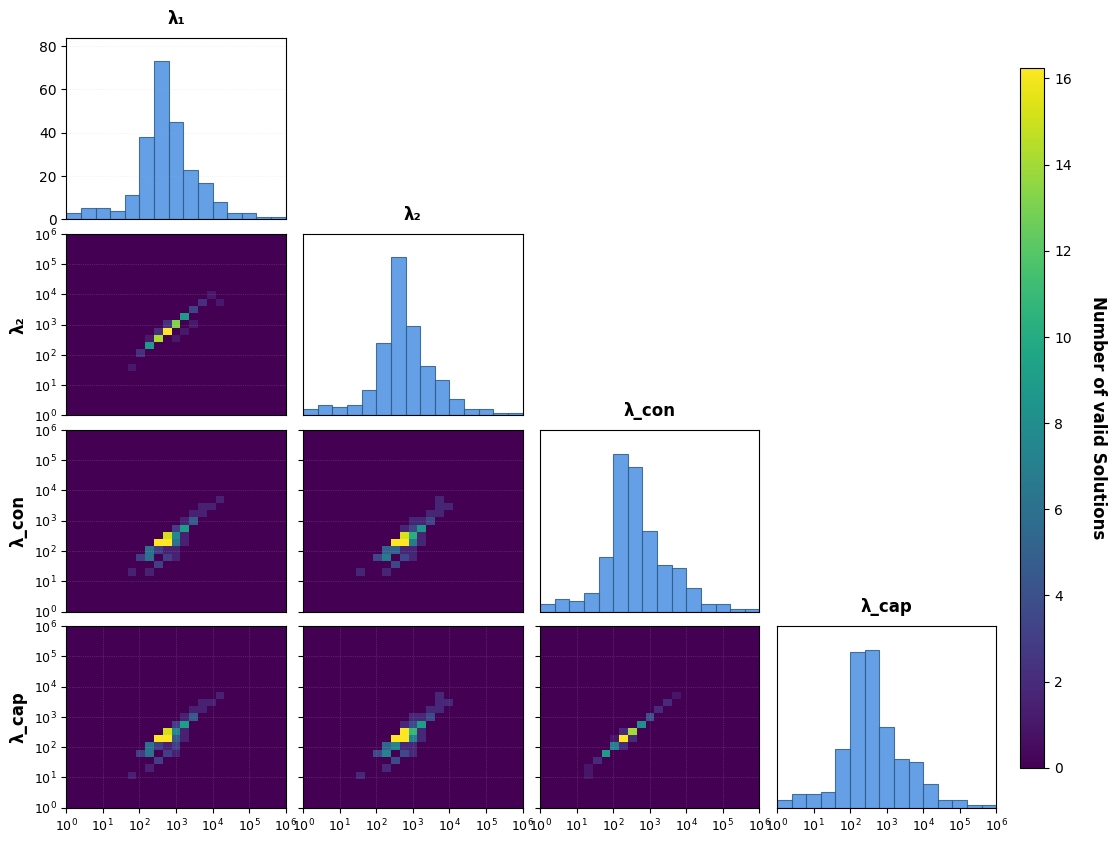

✓ Paper-style matrix saved: ultra_params.png
  Max valid solutions in one bin: 23


'ultra_params.png'

In [6]:
"""
Paper-Style Pairwise Matrix wie im Referenzbild:
- Histogramme: Standard blau (keine Valid/Invalid Trennung)
- Heatmaps: Viridis (lila → gelb) für Anzahl valider Lösungen
- Feinere Grid-Auflösung mit heatmap_bins Parameter
"""
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.gridspec import GridSpec

def prepare_dataframe(df):
    """Bereite DataFrame vor"""
    cols = list(df.columns)
    
    def pick_col(candidates, cols):
        for c in candidates:
            if c in cols:
                return c
        lower = {c.lower(): c for c in cols}
        for cand in candidates:
            if cand.lower() in lower:
                return lower[cand.lower()]
        return None
    
    name_col = pick_col(['config_name', 'config', 'name'], cols)
    viol_col = pick_col(['total_violations', 'violations'], cols)
    valid_col = pick_col(['is_valid', 'valid', 'feasible'], cols)
    
    if valid_col is None and viol_col is not None:
        df['is_valid'] = (df[viol_col].fillna(0) == 0).astype(bool)
        valid_col = 'is_valid'
    
    df.attrs['name_col'] = name_col
    df.attrs['viol_col'] = viol_col
    df.attrs['valid_col'] = valid_col
    
    return df


def create_paper_style_matrix(df, 
                              scenario_filter=None,
                              output_path='/mnt/user-data/outputs/paper_style_matrix.png',
                              bins='auto',
                              colormap='viridis',
                              heatmap_bins=None):
    """
    Erstellt Paper-Style Matrix wie im Referenzbild.
    
    Histogramme: Standard blau (zeigt nur Konfigurationsverteilung)
    Heatmaps: Viridis (lila-gelb) für Anzahl valider Lösungen
    
    Parameters:
    -----------
    df : DataFrame
        Deine results mit Spalten: lam_c1, lam_c2, lam_c3_and, lam_c3_cap, is_valid
    scenario_filter : str, optional
        Regex filter für config_name
    output_path : str
        Pfad für Output-PNG
    bins : 'auto' oder int
        Anzahl bins für Histogramme
    colormap : str
        'viridis', 'plasma', 'inferno', 'magma', 'cividis'
    heatmap_bins : int oder None
        Anzahl bins für Heatmaps (default: 3× histogram bins)
        Empfohlen: 50-60 für ~30 valide Lösungen
    """
    
    df = prepare_dataframe(df)
    
    if scenario_filter:
        name_col = df.attrs.get('name_col', 'config_name')
        df = df[df[name_col].str.contains(scenario_filter, regex=True)]
    
    lambda_cols = ['lam_c1', 'lam_c2', 'lam_c3_and', 'lam_c3_cap']
    lambda_names = ['λ₁', 'λ₂', 'λ_con', 'λ_cap']
    
    # Filtere: alle Lambdas > 0
    df_plot = df[(df[lambda_cols] > 0).all(axis=1)].copy()
    
    valid_col = df.attrs.get('valid_col', 'is_valid')
    if valid_col not in df_plot.columns:
        print("⚠️  Keine Validitäts-Spalte gefunden")
        df_plot['is_valid'] = True
        valid_col = 'is_valid'
    
    # Konvertiere zu Log10
    log_data = {}
    for col in lambda_cols:
        log_data[col] = np.log10(df_plot[col])
    
    # Berechne Grenzen
    all_log_values = np.concatenate([log_data[col] for col in lambda_cols])
    
    if bins == 'auto':
        log_range = all_log_values.max() - all_log_values.min()
        bins = max(15, int(log_range / 0.2))
    
    # Heatmap bins: Default ist 3× höher als Histogramm bins für feineres Grid
    if heatmap_bins is None:
        heatmap_bins = bins * 5  # Feineres Grid für Heatmaps!
    
    log_min = np.floor(all_log_values.min())
    log_max = np.ceil(all_log_values.max())
    
    n = len(lambda_cols)
    
    # Statistik
    n_total = len(df_plot)
    n_valid = df_plot[valid_col].sum()
    n_invalid = n_total - n_valid
    validity_rate = (n_valid / n_total * 100) if n_total > 0 else 0
    
    print(f"\n{'='*70}")
    print(f"Datenanalyse:")
    print(f"  Total Configs:    {n_total}")
    print(f"  Valid Solutions:  {n_valid} ({validity_rate:.1f}%)")
    print(f"  Invalid:          {n_invalid} ({100-validity_rate:.1f}%)")
    print(f"  Log-Range:        [{log_min:.1f}, {log_max:.1f}]")
    print(f"  Histogram Bins:   {bins}")
    print(f"  Heatmap Bins:     {heatmap_bins} (finer grid)")
    print(f"{'='*70}\n")
    
    # Figure Setup
    fig = plt.figure(figsize=(12, 10))
    gs = GridSpec(n, n, figure=fig, hspace=0.08, wspace=0.08)
    
    # Tracking für Colorbar
    max_valid_count = 0
    
    for i in range(n):
        for j in range(n):
            if j > i:
                continue
            
            ax = fig.add_subplot(gs[i, j])
            
            if i == j:
                # ====================================
                # DIAGONALE: Standard Blau Histogramme
                # Zeigt NUR die Konfigurationsverteilung
                # ====================================
                # ====================================
                # DIAGONALE: Histogramme (blaue Balken)
                # ====================================
                data_log = log_data[lambda_cols[i]]
                hist_bins = max(15, bins // 2)
                counts, edges = np.histogram(data_log, bins=hist_bins, range=(log_min, log_max))

                ax.bar(edges[:-1], counts, width=np.diff(edges),
                    color='#4A90E2', edgecolor='#2E5C8A',
                    alpha=0.85, align='edge', linewidth=0.8)

                ax.set_xlim([log_min, log_max])
                ax.set_ylim([0, counts.max() * 1.15])

                # Titel OBEN statt unten
                ax.set_title(lambda_names[i], fontsize=12, fontweight='bold', pad=10)

                # X-Ticks nur beim letzten Histogramm (unten rechts)
                if i == n - 1:  
                    ticks = np.arange(log_min, log_max + 1, 1)
                    ax.set_xticks(ticks)
                    ax.set_xticklabels([f'$10^{{{int(t)}}}$' for t in ticks], fontsize=9)
                else:
                    ax.set_xticks([])
                    ax.set_xticklabels([])
                    ax.tick_params(axis='x', length=0)
                ax.set_xlabel('')

                # Y-Achse nur in der ersten Spalte
                if j == 0:
                    ax.set_ylabel('', fontsize=12)
                else:
                    ax.set_yticks([])
                    ax.set_yticklabels([])
                    ax.tick_params(axis='y', length=0)

                ax.grid(True, alpha=0.25, axis='y', linestyle=':', linewidth=0.5)

                    
            else:
                # ====================================
                # UNTERES DREIECK: Viridis Heatmaps
                # Zeigt Anzahl VALIDER Lösungen
                # ====================================
                x_data_log = log_data[lambda_cols[j]]
                y_data_log = log_data[lambda_cols[i]]
                
                # Nur valide Lösungen
                mask_valid = df_plot[valid_col].astype(bool)
                x_valid = x_data_log[mask_valid]
                y_valid = y_data_log[mask_valid]
                
                # 2D Histogram für valide mit feinerer Auflösung
                hist_valid, xedges, yedges = np.histogram2d(
                    x_valid, y_valid,
                    bins=heatmap_bins,  # Verwende feinere Auflösung!
                    range=[[log_min, log_max], [log_min, log_max]]
                )
                
                max_valid_count = max(max_valid_count, hist_valid.max())
                
                # Viridis Heatmap (lila → gelb)
                im = ax.imshow(
                    hist_valid.T,
                    origin='lower',
                    extent=[log_min, log_max, log_min, log_max],
                    cmap=colormap,  # 'viridis' = lila → gelb
                    aspect='auto',
                    interpolation='nearest',
                    vmin=0,
                    vmax=max(1, np.percentile(hist_valid[hist_valid > 0], 95) if (hist_valid > 0).any() else 1)
                )
                
                ax.set_xlim([log_min, log_max])
                ax.set_ylim([log_min, log_max])
                
                # Subtiles weißes Grid
                ax.grid(False, alpha=0.25, linestyle=':', linewidth=0.5, color='white')
                
                # Labels
                if j == 0:
                    ax.set_ylabel(lambda_names[i], fontsize=12, fontweight='bold')
                    ticks = np.arange(log_min, log_max + 1, 1)
                    ax.set_yticks(ticks)
                    ax.set_yticklabels([f'$10^{{{int(t)}}}$' for t in ticks], fontsize=9)
                else:
                    ax.set_yticklabels([])
                
                if i == n-1:
    # Nur in der untersten Zeile: x-Ticks + Labels
                    ticks = np.arange(log_min, log_max + 1, 1)
                    ax.set_xticks(ticks)
                    ax.set_xticklabels([f'$10^{{{int(t)}}}$' for t in ticks], fontsize=9)
                    ax.set_xlabel("", fontsize=12, fontweight='bold', labelpad=5)
                else:
                    # Darüber: nichts anzeigen
                    ax.set_xticks([])
                    ax.set_xticklabels([])
                    ax.tick_params(axis='x', length=0)
                    ax.set_xlabel('')
    
    # Colorbar
    cbar_ax = fig.add_axes([0.92, 0.15, 0.02, 0.7])
    cbar = plt.colorbar(im, cax=cbar_ax)
    cbar.set_label('Number of valid Solutions', 
                   rotation=270, labelpad=25, fontsize=12, fontweight='bold')
    cbar.ax.tick_params(labelsize=10)
    
    # Titel mit Statistik
    #title = (f'Configurations: {n_total} | Valid: {n_valid} ({validity_rate:.1f}%)')
    
    #fig.suptitle(title, fontsize=15, fontweight='bold', y=0.98)
    
    plt.show()
    plt.close()
    
    print(f"✓ Paper-style matrix saved: {output_path}")
    print(f"  Max valid solutions in one bin: {int(max_valid_count)}")
    
    return output_path


# ============================================================================
# DIREKT VERWENDBAR - Kopiere diese Zeilen in dein Notebook:
# ============================================================================

create_paper_style_matrix(
    df_results_ultrafine,
    heatmap_bins=25,              # Empfohlen: 50 für ~30 valide Lösungen
    colormap='viridis',            # Lila → Gelb
    output_path='ultra_params.png'
)